<a href="https://colab.research.google.com/github/evavesely/thesis/blob/main/Thesis_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.0 MB/s eta 0:00:00
  Created wheel for convokit: filename=convokit-3.0.0-py3-none-any.whl size=216707 sha256=e9598156d64810c293989ff70fdce3cf6d4b07a7a55c9aa78fce1737ca6d092d
  Stored in directory: /root/.cache/pip/wheels/c4/89/8c/2677fdb888588b6f93cb6ac86bdfb020f1f1c3

In [ ]:
!pip install textblob

In [ ]:
!pip install Genderize

In [ ]:
!pip install fuzzywuzzy

In [54]:
!pip install tabulate

In [55]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
from wordcloud import WordCloud
#from genderize import Genderize
#from fuzzywuzzy import fuzz
from collections import defaultdict
from google.colab import files
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
import nltk
nltk.download('punkt')
from tabulate import tabulate

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(Genderize().get(['Morgan']))

[{'count': 18372, 'name': 'Morgan', 'gender': 'male', 'probability': 0.79}]


In [ ]:
chars_df = pd.read_csv("character_features.csv")
chars_df.head()

,Unnamed: 0,0,tot_feel,tot_fill,tot_hw,stopwords,polarity,cursewords,FK,uniqwords
0,KAT____10-Things-I-Hate-About-You_script,"leave it i said , leave it ! why did n't we ju...",18.0,0.0,87.0,97.0,-0.9984,0.0,0.0,603.0
1,PATRICK____10-Things-I-Hate-About-You_script,i missed you . it was a bratwurst . i was eati...,6.0,13.0,60.0,86.0,-0.9952,0.0,0.0,465.0
2,BIANCA____10-Things-I-Hate-About-You_script,did you change your hair ? you might wan na th...,13.0,9.0,75.0,85.0,0.9968,0.0,0.0,418.0
3,CAMERON____10-Things-I-Hate-About-You_script,"i do n't think so , ma'am so they tell me ... ...",8.0,8.0,58.0,71.0,0.9951,0.0,0.0,316.0
4,MICHAEL____10-Things-I-Hate-About-You_script,you the new guy ? c'mon . i 'm supposed to giv...,7.0,3.0,46.0,83.0,0.9984,0.0,0.0,419.0


In [ ]:
chars_df = pd.read_csv("character_features.csv")
chars_df = chars_df.rename(columns={"Unnamed: 0": "speaker", "0": "text"})
chars_df['speaker'] = chars_df['speaker'].map(lambda x: x.split('____'))
chars_df['movie'] = chars_df['speaker'].map(lambda x: x[1])
chars_df['speaker'] = chars_df['speaker'].map(lambda x: x[0])
chars_df['movie'] = chars_df['movie'].str.lower()
chars_df['movie'] = chars_df['movie'].str.replace('-', ' ')
chars_df['movie'] = chars_df['movie'].str.replace('_script', '')
chars_df.head(100)

,speaker,text,tot_feel,tot_fill,tot_hw,stopwords,polarity,cursewords,FK,uniqwords,movie
0,KAT,"leave it i said , leave it ! why did n't we ju...",18.0,0.0,87.0,97.0,-0.9984,0.0,0.0,603.0,10 things i hate about you
1,PATRICK,i missed you . it was a bratwurst . i was eati...,6.0,13.0,60.0,86.0,-0.9952,0.0,0.0,465.0,10 things i hate about you
2,BIANCA,did you change your hair ? you might wan na th...,13.0,9.0,75.0,85.0,0.9968,0.0,0.0,418.0,10 things i hate about you
3,CAMERON,"i do n't think so , ma'am so they tell me ... ...",8.0,8.0,58.0,71.0,0.9951,0.0,0.0,316.0,10 things i hate about you
4,MICHAEL,you the new guy ? c'mon . i 'm supposed to giv...,7.0,3.0,46.0,83.0,0.9984,0.0,0.0,419.0,10 things i hate about you
...,...,...,...,...,...,...,...,...,...,...,...
95,JAMIE,"oh , look . he brought a bag lunch . how sp . ...",1.0,1.0,1.0,27.0,-0.2018,0.0,0.0,60.0,17 again
96,JUDGE,you 've request a divorce by the state of cali...,0.0,2.0,0.0,25.0,0.8896,0.0,0.0,77.0,17 again
97,LAUREN,he 's coming . pretend you 're not here . oh m...,0.0,1.0,2.0,20.0,0.7912,0.0,0.0,59.0,17 again
98,DOM,who cares ? he 's the water boy . i 'm dicatin...,0.0,2.0,0.0,11.0,0.8834,0.0,0.0,35.0,17 again


In [ ]:
chars_df[chars_df['text'].apply(lambda x: isinstance(x, float))]

,speaker,text,tot_feel,tot_fill,tot_hw,stopwords,polarity,cursewords,FK,uniqwords,movie
100,CONTINUED,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001 a space odyssey
110,CENTRIFUGE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001 a space odyssey
112,B20,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001 a space odyssey
114,C12,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001 a space odyssey
117,D1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001 a space odyssey
...,...,...,...,...,...,...,...,...,...,...,...
10778,2/27/68,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"wild bunch, the"
10822,McGRATH,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wild wild west
10864,Oh!,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"wizard of oz, the"
11000,(in Korean,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes man


In [29]:
cot_labeled = pd.read_csv("labeled_cot.csv")
baseline_labeled = pd.read_csv("labeled_baseline.csv")
matches = (cot_labeled['gpt_label'] == baseline_labeled['gpt_label']).sum()
matches

5857

In [63]:
cot_test = pd.read_csv("cleaned-cot.csv")
cot_test['gpt_label'].value_counts()
cot_test['gpt_label'] = cot_test['gpt_label'].replace({'M': 'm', 'F': 'f', '?\n':'?'})
cot_test['meta.gender'] = cot_test['meta.gender'].replace({'M': 'm', 'F': 'f'})

In [64]:
matches = (cot_test['gpt_label'] == cot_test['meta.gender']).sum()
total_elements = len(cot_test)
cot_percent_match = (matches / total_elements) * 100
cot_percent_match

40.57553956834533

In [ ]:
print(cot_test['gpt_label'].value_counts())
print(cot_test['meta.gender'].value_counts())

m    5920
f    2089
?    1026
Name: gpt_label, dtype: int64
?    6020
m    2049
f     966
Name: meta.gender, dtype: int64


In [65]:
filtered_cot = cot_test[cot_test['meta.gender'] == 'm']
matches = (filtered_cot['gpt_label'] == filtered_cot['meta.gender']).sum()
total_elements = len(filtered_cot)
cot_male_match = (matches / total_elements) * 100
cot_male_match

94.87554904831626

In [67]:
filtered_cot = cot_test[cot_test['meta.gender'] == 'f']
matches = (filtered_cot['gpt_label'] == filtered_cot['meta.gender']).sum()
total_elements = len(filtered_cot)
cot_female_match = (matches / total_elements) * 100
cot_female_match

86.23188405797102

In [9]:
cot_male = cot_test[cot_test['gpt_label'] == 'm']
cot_female = cot_test[cot_test['gpt_label'] == 'f']
#cot_male['gpt_reason'] = cot_male['gpt_reason'].map(str)
cot_male['gpt_reason'] = cot_male['gpt_reason'].apply(lambda x: word_tokenize(x))
cot_female['gpt_reason'] = cot_female['gpt_reason'].apply(lambda x: word_tokenize(x))

<ipython-input-9-a09e1a4fbdf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_male['gpt_reason'] = cot_male['gpt_reason'].apply(lambda x: word_tokenize(x))
<ipython-input-9-a09e1a4fbdf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_female['gpt_reason'] = cot_female['gpt_reason'].apply(lambda x: word_tokenize(x))


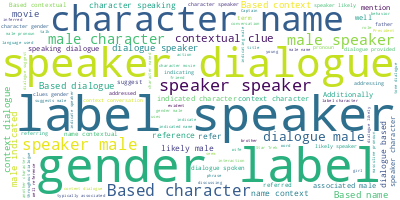

In [ ]:
all_tokens = ' '.join(cot_male['gpt_reason'].apply(lambda tokens: ' '.join(token for token in tokens if len(token) > 3 and token not in stoplist)))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_tokens)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
cvec_cot_male = CountVectorizer(stop_words=stoplist, ngram_range=(1,2))
cot_male['gpt_reason'] = cot_male['gpt_reason'].apply(lambda x: ' '.join(token for token in x))
ngrams = cvec_cot_male.fit_transform(cot_male['gpt_reason'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_cot_male.vocabulary_
# calculating polarity/ subjectivity
cot_ngram_male = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
cot_ngram_male['polarity'] = cot_ngram_male['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
cot_ngram_male['subjective'] = cot_ngram_male['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-10-1e98651b56fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_male['gpt_reason'] = cot_male['gpt_reason'].apply(lambda x: ' '.join(token for token in x))


In [11]:
cot_ngram_male[(cot_ngram_male['polarity'] > 0.2)].head(20)

,frequency,unigram/bigram/trigram,polarity,subjective
128,96,authoritative,0.300000,0.900000
134,89,evident,0.250000,0.250000
245,41,love,0.500000,0.600000
251,40,good,0.700000,0.600000
268,38,first,0.250000,0.333333
291,35,authoritative tone,0.300000,0.900000
335,30,confident,0.500000,0.833333
356,28,assertive authoritative,0.300000,0.900000
422,23,strong,0.433333,0.733333
427,23,confidently,0.500000,0.833333


In [12]:
cot_ngram_male[(cot_ngram_male['polarity'] < -0.2)].head(20)

,frequency,unigram/bigram/trigram,polarity,subjective
281,36,commonly,-0.300000,0.500000
289,35,casual,-0.500000,0.866667
324,30,tough,-0.388889,0.833333
344,29,commonly associated,-0.300000,0.500000
363,27,past,-0.250000,0.250000
634,16,hard,-0.291667,0.541667
668,15,game,-0.400000,0.400000
739,13,usual,-0.250000,0.250000
810,12,stereotypical,-0.500000,1.000000
848,12,fucking,-0.600000,0.800000


In [13]:
cot_male_len = len(cot_ngram_male['polarity'])
avg_pol = cot_ngram_male['polarity'].sum() / cot_male_len
avg_sub = cot_ngram_male['subjective'].sum() /  cot_male_len
avg_neutral = len(cot_ngram_male[(cot_ngram_male['polarity'] == 0.0) & (cot_ngram_male['subjective'] == 0.0)]) / cot_male_len
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.005372724542156857
0.0668302055941794
0.8491703056768559


In [14]:
cvec_cot_female = CountVectorizer(stop_words=stoplist, ngram_range=(1,2))
cot_female['gpt_reason'] = cot_female['gpt_reason'].apply(lambda x: ' '.join(token for token in x))
ngrams = cvec_cot_female.fit_transform(cot_female['gpt_reason'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_cot_female.vocabulary_
# calculating polarity/ subjectivity
cot_ngram_female = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
cot_ngram_female['polarity'] = cot_ngram_female['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
cot_ngram_female['subjective'] = cot_ngram_female['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-14-57148851a843>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cot_female['gpt_reason'] = cot_female['gpt_reason'].apply(lambda x: ' '.join(token for token in x))


In [15]:
cot_ngram_female[(cot_ngram_female['polarity'] > 0.2)].head(20)

,frequency,unigram/bigram/trigram,polarity,subjective
127,29,love,0.500000,0.600000
196,17,evident,0.250000,0.250000
200,16,rose,0.600000,0.950000
219,15,first,0.250000,0.333333
280,12,married,0.250000,0.250000
406,8,sweet,0.350000,0.650000
415,8,pregnant,0.333333,0.500000
455,8,confident,0.500000,0.833333
477,7,strong,0.433333,0.733333
557,6,safe,0.500000,0.500000


In [ ]:
cot_ngram_female[(cot_ngram_female['polarity'] < -0.2)].head(20)

,frequency,unigram/bigram/trigram,polarity,subjective
332,10,past,-0.250000,0.250000
616,6,game,-0.400000,0.400000
1125,3,uncut,-0.500000,0.800000
1138,3,things hate,-0.800000,0.900000
1350,3,longer uncut,-0.500000,0.800000
1435,3,hate,-0.800000,0.900000
1437,3,hard,-0.291667,0.541667
1499,3,disappointment,-0.600000,0.400000
1545,3,cruel intentions,-1.000000,1.000000
1546,3,cruel,-1.000000,1.000000


In [16]:
cot_female_len = len(cot_ngram_female['polarity'])
avg_pol = cot_ngram_female['polarity'].sum() / cot_female_len
avg_sub = cot_ngram_female['subjective'].sum() /  cot_female_len
avg_neutral = len(cot_ngram_female[(cot_ngram_female['polarity'] == 0.0) & (cot_ngram_female['subjective'] == 0.0)]) / cot_female_len
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.010632301793796007
0.06808428453988073
0.852354236204815


In [17]:
baseline_test = pd.read_csv("labeled_baseline.csv")
baseline_test['gpt_label'].nunique()

43

In [68]:
baseline_test = pd.read_csv("cleaned-baseline.csv")
baseline_test['gpt_label'] = baseline_test['gpt_label'].replace({'M': 'm','?\n':'?','?\n\n':'?','m ':'m','? ':'?'})
baseline_test['meta.gender'] = baseline_test['meta.gender'].replace({'M': 'm', 'F': 'f'})
baseline_test['gpt_label'].value_counts()

m    4889
f    2928
?    1218
Name: gpt_label, dtype: int64

In [69]:
matches = (baseline_test['gpt_label'] == baseline_test['meta.gender']).sum()
total_elements = len(baseline_test)
baseline_percent_match = (matches / total_elements) * 100
print(baseline_percent_match)
print(baseline_test['gpt_label'].value_counts())
print(baseline_test['meta.gender'].value_counts())

37.10016602102933
m    4889
f    2928
?    1218
Name: gpt_label, dtype: int64
?    6020
m    2049
f     966
Name: meta.gender, dtype: int64


In [70]:
baseline_male = baseline_test[baseline_test['meta.gender'] == 'm']
matches = (baseline_male['gpt_label'] == baseline_male['meta.gender']).sum()
total_elements = len(baseline_male)
baseline_male_match = (matches / total_elements) * 100
print(baseline_male_match)

75.74426549536359


In [71]:
baseline_female = baseline_test[baseline_test['meta.gender'] == 'f']
matches = (baseline_female['gpt_label'] == baseline_female['meta.gender']).sum()
total_elements = len(baseline_female)
baseline_female_match = (matches / total_elements) * 100
print(baseline_female_match)

78.15734989648033


In [35]:
matches = (baseline_test['gpt_label'] == cot_test['gpt_label']).sum()
matches/ len(cot_test)

0.6610957387935805

In [72]:
meta_test = pd.read_csv("cleaned-meta.csv")
meta_test['gpt_label'] = meta_test['gpt_label'].replace({'m ':'m','f ':'f'})
meta_test['meta.gender'] = meta_test['meta.gender'].replace({'M': 'm', 'F': 'f'})
meta_test['gpt_label'].value_counts()

m    6639
f    2344
?      52
Name: gpt_label, dtype: int64

In [74]:
matches = (meta_test['gpt_label'] == meta_test['meta.gender']).sum()
total_elements = len(meta_test)
meta_percent_match = (matches / total_elements) * 100
print(meta_percent_match)
print(meta_test['gpt_label'].value_counts())
print(meta_test['meta.gender'].value_counts())

32.32982844493636
m    6639
f    2344
?      52
Name: gpt_label, dtype: int64
?    6020
m    2049
f     966
Name: meta.gender, dtype: int64


In [75]:
meta_male = meta_test[meta_test['meta.gender'] == 'm']
matches = (meta_male['gpt_label'] == meta_male['meta.gender']).sum()
total_elements = len(meta_male)
meta_male_match = (matches / total_elements) * 100
print(meta_male_match)

98.29184968277208


In [76]:
meta_female = meta_test[meta_test['meta.gender'] == 'f']
matches = (meta_female['gpt_label'] == meta_female['meta.gender']).sum()
total_elements = len(meta_female)
meta_female_match = (matches / total_elements) * 100
print(meta_female_match)

89.23395445134575


In [62]:
value_counts = {'Label': ['Male', 'Female', '?'],
                'Baseline': baseline_test['gpt_label'].value_counts(),
                'Meta': meta_test['gpt_label'].value_counts(),
                'CoT': cot_test['gpt_label'].value_counts()}

value_df = pd.DataFrame(value_counts)
print(tabulate(value_df, headers='keys', showindex = False))
print(tabulate(value_df, headers='keys', showindex = False, tablefmt = 'latex'))


Label      Baseline    Meta    CoT
-------  ----------  ------  -----
Male           4889    6639   5920
Female         2928    2344   2089
?              1218      52   1026
\begin{tabular}{lrrr}
\hline
 Label   &   Baseline &   Meta &   CoT \\
\hline
 Male    &       4889 &   6639 &  5920 \\
 Female  &       2928 &   2344 &  2089 \\
 ?       &       1218 &     52 &  1026 \\
\hline
\end{tabular}


In [77]:
error_results = {'': ['Overall', 'Male', 'Female'],
                 'Baseline': [baseline_percent_match, baseline_male_match, baseline_female_match],
                 'Meta': [meta_percent_match, meta_male_match, meta_female_match],
                 'CoT': [cot_percent_match, cot_male_match, cot_female_match]}
error_results_df = pd.DataFrame(error_results)
print(tabulate(error_results_df, headers='keys', showindex = False))
print(tabulate(error_results_df, headers='keys', showindex = False, tablefmt = 'latex'))

           Baseline     Meta      CoT
-------  ----------  -------  -------
Overall     37.1002  32.3298  40.5755
Male        75.7443  98.2918  94.8755
Female      78.1573  89.234   86.2319
\begin{tabular}{lrrr}
\hline
         &   Baseline &    Meta &     CoT \\
\hline
 Overall &    37.1002 & 32.3298 & 40.5755 \\
 Male    &    75.7443 & 98.2918 & 94.8755 \\
 Female  &    78.1573 & 89.234  & 86.2319 \\
\hline
\end{tabular}


In [ ]:
# downloading corpus
from convokit import Corpus, download
corpus = Corpus(filename=download("movie-corpus"))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [ ]:
corpus.print_summary_stats()

Number of Speakers: 9035
Number of Utterances: 304713
Number of Conversations: 83097


In [ ]:
convo = corpus.random_conversation()
speaker = corpus.random_speaker()
utt = corpus.random_utterance()

In [ ]:
# visualizing data
convo.print_conversation_structure()
convo.print_conversation_structure(lambda utt: utt.text[:80])

u327
    u340
So, wasn't Rothschild originally handling the Fisher account? How did you get it
    I could tell you that, Halberstam, but then I'd have to kill you.


In [ ]:
# getting speaker data
speaker_data = corpus.get_speakers_dataframe()
speaker_data["meta.gender"].value_counts()
len(speaker_data)

9035

In [ ]:
speaker_data.head()

,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos
id,,,,,,
u0,[],BIANCA,m0,10 things i hate about you,f,4
u2,[],CAMERON,m0,10 things i hate about you,m,3
u3,[],CHASTITY,m0,10 things i hate about you,?,?
u4,[],JOEY,m0,10 things i hate about you,m,6
u5,[],KAT,m0,10 things i hate about you,f,2


In [ ]:
 # list of common female names
female_names = []
with open("female.txt", "r") as f:
    for line in f:
        if not line.startswith("#") and line.strip() != "":  # remove comments and empty lines
            female_names.append(line.strip().lower())


In [ ]:
# list of common  male names
male_names = []
with open("male.txt", "r") as f:
    for line in f:
        if not line.startswith("#") and line.strip() != "":  # remove comments and empty lines
            male_names.append(line.strip().lower())

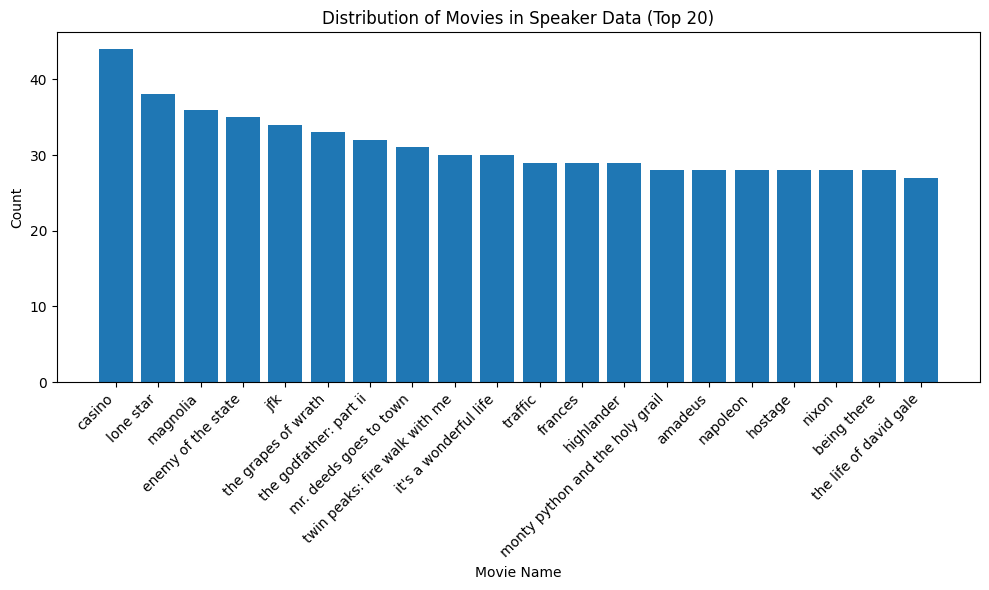

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate the distribution of movies (cornell)
movie_distribution = speaker_data["meta.movie_name"].value_counts()

# Create a DataFrame with movie names and their counts
df = pd.DataFrame({
    'Movie Name': movie_distribution.index,
    'Count': movie_distribution.values
})

# Sort the DataFrame by counts in descending order
df = df.sort_values(by='Count', ascending=False)

# Plot the distribution of movies
plt.figure(figsize=(10, 6))
plt.bar(df['Movie Name'][:20], df['Count'][:20])
plt.xlabel('Movie Name')
plt.ylabel('Count')
plt.title('Distribution of Movies in Speaker Data (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

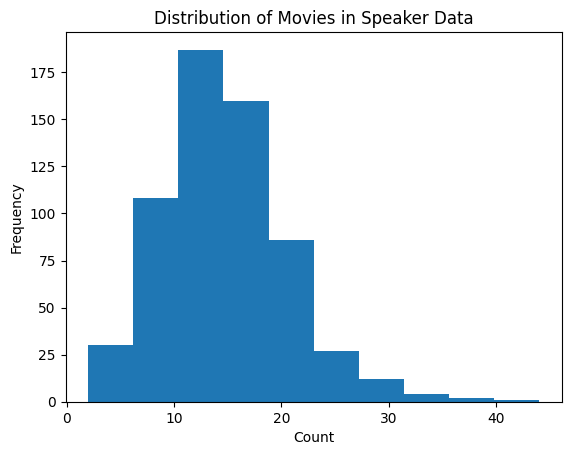

In [ ]:
# plotting histogram of how often movies appear (cornell)
pd.set_option('display.max_rows', 650)
df = pd.DataFrame({
    'Distribution of Movies in Speaker Data': speaker_data["meta.movie_name"].value_counts()
    })
df.hist()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(which='both', color='none')

In [ ]:
utter_data_orig = corpus.get_utterances_dataframe()
utter_data = utter_data_orig.groupby('speaker')['text'].apply(list).reset_index()

In [ ]:
# visualizing
test_list = utter_data[utter_data['speaker'] == 'u0']['text']

test_list[0]
test_string = ' '.join(test_list[0])
test_string.lower()

'they do not! i hope so. let\'s go. okay -- you\'re gonna need to learn how to lie. i\'m kidding.  you know how sometimes you just become this "persona"?  and you don\'t know how to quit? like my fear of wearing pastels? what good stuff? me.  this endless ...blonde babble. i\'m like, boring myself. do you listen to this crap? then guillermo says, "if you go any lighter, you\'re gonna look like an extra on 90210." but well, no... i was? tons you know chastity? hi. who knows?  all i\'ve ever heard her say is that she\'d dip before dating a guy that smokes. lesbian?  no. i found a picture of jared leto in one of her drawers, so i\'m pretty sure she\'s not harboring same-sex tendencies. i really, really, really wanna go, but i can\'t.  not unless my sister goes. eber\'s deep conditioner every two days. and i never, ever use a blowdryer without the diffuser attachment. you\'re sweet. i counted on you to help my cause. you and that thug are obviously failing. aren\'t we ever going on our dat

In [ ]:
# merging so text is in speaker data
merged_data = pd.merge(speaker_data, utter_data, left_index=True, right_on='speaker', how='left').reset_index()

In [ ]:
# cleaning up
merged_data['text'] = merged_data['text'].map(lambda x: ' '.join(x))
merged_data['text'] = merged_data['text'].map(lambda x: x.lower())
merged_data.head()

,index,vectors,meta.character_name,meta.movie_idx,meta.movie_name,meta.gender,meta.credit_pos,speaker,text
0,0,[],BIANCA,m0,10 things i hate about you,f,4,u0,they do not! i hope so. let's go. okay -- you'...
1,1112,[],CAMERON,m0,10 things i hate about you,m,3,u2,"they do to! she okay? wow no the ""real you"". i..."
2,2223,[],CHASTITY,m0,10 things i hate about you,?,?,u3,you think you ' re the only sophomore at the p...
3,3334,[],JOEY,m0,10 things i hate about you,m,6,u4,"listen, i want to talk to you about the prom. ..."
4,4445,[],KAT,m0,10 things i hate about you,f,2,u5,perm? it's just you. what? to completely damag...


In [ ]:
error_test = merged_data.to_csv('error_test.csv', index=False)
files.download('error_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# merging two datasets and removing duplicates
chars_df['meta.movie_name'] = chars_df['movie']
chars_df['meta.character_name'] = chars_df['speaker']
chars_df['meta.gender'] = '?'
testdf = pd.concat([merged_data[['meta.movie_name', 'meta.character_name', 'meta.gender', 'text']], chars_df[['meta.movie_name', 'meta.character_name', 'meta.gender', 'text']]], ignore_index = True)
testdf.drop_duplicates(subset=['meta.movie_name', 'meta.character_name'], inplace = True)
testdf = testdf[testdf['meta.movie_name'] != 'twelve monkeys']
testdf.reset_index(drop=True, inplace=True)
print(len(testdf))
print(len(speaker_data))
print(len(chars_df))
testdf

17859
9035
11075


,meta.movie_name,meta.character_name,meta.gender,text
0,10 things i hate about you,BIANCA,f,they do not! i hope so. let's go. okay -- you'...
1,10 things i hate about you,CAMERON,m,"they do to! she okay? wow no the ""real you"". i..."
2,10 things i hate about you,CHASTITY,?,you think you ' re the only sophomore at the p...
3,10 things i hate about you,JOEY,m,"listen, i want to talk to you about the prom. ..."
4,10 things i hate about you,KAT,f,perm? it's just you. what? to completely damag...
...,...,...,...,...
17854,zootopia,MAJOR FRIEDKIN,?,listen up cadets ! zootopia has 12 unique ecos...
17855,zootopia,ORYX POOTOSSER,?,do n't expect us to apologize for it . you shu...
17856,zootopia,YAX,?,"uh , emmitt otterton ? been coming to your yog..."
17857,zootopia,MEAN KID ANIMAL,?,"okay , ! ready for initiation ? okay . now rai..."


In [ ]:
# labeling using lists of popular names
for index, speaker in testdf.iterrows():
  if speaker['meta.gender'] == 'M':
    speaker['meta.gender'] = 'm'
  if speaker['meta.gender'] == 'F':
    speaker['meta.gender'] = 'f'
  if speaker['meta.gender'] == '?':
    if speaker['meta.character_name'].lower() in female_names:
      speaker['meta.gender'] = 'f'
    elif speaker['meta.character_name'].lower() in male_names:
      speaker['meta.gender'] = 'm'

In [ ]:
print(len(testdf[testdf['meta.gender'] == 'f']))
print(len(testdf[testdf['meta.gender'] == 'm']))
print(len(testdf[testdf['meta.gender'] == '?']))

3975
5058
8826


In [ ]:
selected_rows = testdf[testdf['text'].apply(lambda x: isinstance(x, float))]
selected_rows

,meta.movie_name,meta.character_name,meta.gender,text
9088,2001 a space odyssey,CONTINUED,?,NaN
9098,2001 a space odyssey,CENTRIFUGE,?,NaN
9100,2001 a space odyssey,B20,?,NaN
9102,2001 a space odyssey,C12,?,NaN
9105,2001 a space odyssey,D1,?,NaN
...,...,...,...,...
17609,"wild bunch, the",2/27/68,?,NaN
17641,wild wild west,McGRATH,?,NaN
17674,"wizard of oz, the",Oh!,?,NaN
17784,yes man,(in Korean,?,NaN


In [ ]:
selected_rows = testdf[testdf['meta.character_name'] == ""]
selected_rows

,meta.movie_name,meta.character_name,meta.gender,text
3765,arctic blue,,?,215 continued: 175 continued: 150 continued...
6559,memento,,?,memento pink revisions - 9/7/99 85. 79. 78. 39...
15105,panic room,,?,NaN


In [ ]:
# removing duplicates after open refine cleaning
cleandf = pd.read_csv("combodf_openrefine.csv")
print(len(cleandf))
cleandf.drop_duplicates(subset=['meta.movie_name', 'meta.character_name'], inplace = True)
print(len(cleandf))

# dowloading fully cleaned data
cleandf.to_csv('combodf_fullclean.csv', index=False)
files.download('combodf_fullclean.csv')

17859
17123


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labeled_testdf = pd.read_csv("combo_labeled.csv")
labeled_testdf2 = pd.read_csv("combo_labeled_wspeakers.csv")

In [ ]:
labeled_testdf3 = pd.read_csv("combo_labeled3.csv")

In [ ]:
print(len(labeled_testdf))
print(len(labeled_testdf[labeled_testdf['meta.gender'] == 'f']))
print(len(labeled_testdf[labeled_testdf['meta.gender'] == 'm']))
print(len(labeled_testdf[labeled_testdf['meta.gender'] == '?']))

17859
5591
9816
1749


In [ ]:
# 883 to clean up
print(len(labeled_testdf2))
print(len(labeled_testdf2[labeled_testdf2['meta.gender'] == 'f']))
print(len(labeled_testdf2[labeled_testdf2['meta.gender'] == 'm']))
print(len(labeled_testdf2[labeled_testdf2['meta.gender'] == '?']))

17859
5652
10356
894


In [ ]:
# 259 to clean up!
print(len(labeled_testdf3))
print(len(labeled_testdf3[labeled_testdf3['meta.gender'] == 'f']))
print(len(labeled_testdf3[labeled_testdf3['meta.gender'] == 'm']))
print(len(labeled_testdf3[labeled_testdf3['meta.gender'] == '?']))

17123
5002
10327
1535


In [ ]:
cleanup = labeled_testdf3[~labeled_testdf3['meta.gender'].isin(['m', 'f', '?'])]
len(cleanup)
cleanup.to_csv('cleanup.csv', index=False)
files.download('cleanup.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#cleaned with open refine + manual
cleaned_200 = pd.read_csv("cleaned.csv")
cleaned_200['meta.gender'].nunique()
cleaned_200['meta.gender'].value_counts()

# merging into finak
final_df = pd.merge(labeled_testdf3, cleaned_200, on=['meta.movie_name', 'meta.character_name', 'text'], how='left', suffixes=('_final', '_clean'))
final_df['meta.gender'] = final_df['meta.gender_clean'].combine_first(final_df['meta.gender_final'])
final_df.drop(['meta.gender_clean'], axis=1, inplace=True)

test = final_df[final_df['meta.character_name'] == 'FUZZY']
test

final_df.drop(['Unnamed: 0_final', 'meta.gender_final', 'Unnamed: 0_clean'], axis=1, inplace=True)
final_df['meta.gender'].value_counts()
final_df.to_csv('final_df.csv', index=False)
files.download('final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_df['meta.movie_name'].nunique()

1035

In [ ]:
final_df = pd.read_csv("final_df.csv")

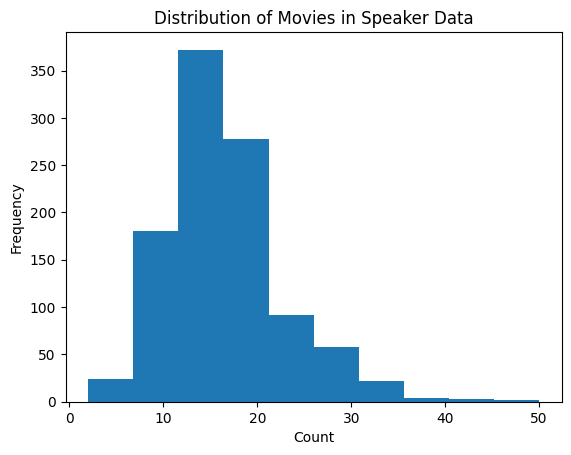

In [ ]:
# repeating with merged dataset
pd.set_option('display.max_rows', 650)
df = pd.DataFrame({
    'Distribution of Movies in Speaker Data': final_df["meta.movie_name"].value_counts()
    })
df.hist()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(which='both', color='none')

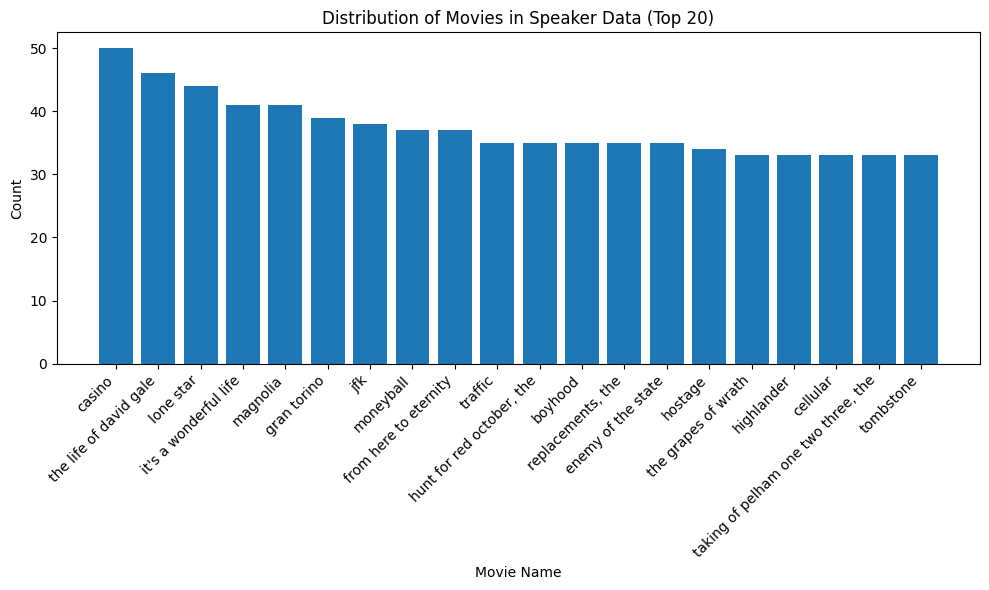

In [ ]:
# Calculate the distribution of movies
movie_distribution = final_df["meta.movie_name"].value_counts()

# Create a DataFrame with movie names and their counts
df = pd.DataFrame({
    'Movie Name': movie_distribution.index,
    'Count': movie_distribution.values
})

# Sort the DataFrame by counts in descending order
df = df.sort_values(by='Count', ascending=False)

# Plot the distribution of movies
plt.figure(figsize=(10, 6))
plt.bar(df['Movie Name'][:20], df['Count'][:20])
plt.xlabel('Movie Name')
plt.ylabel('Count')
plt.title('Distribution of Movies in Speaker Data (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

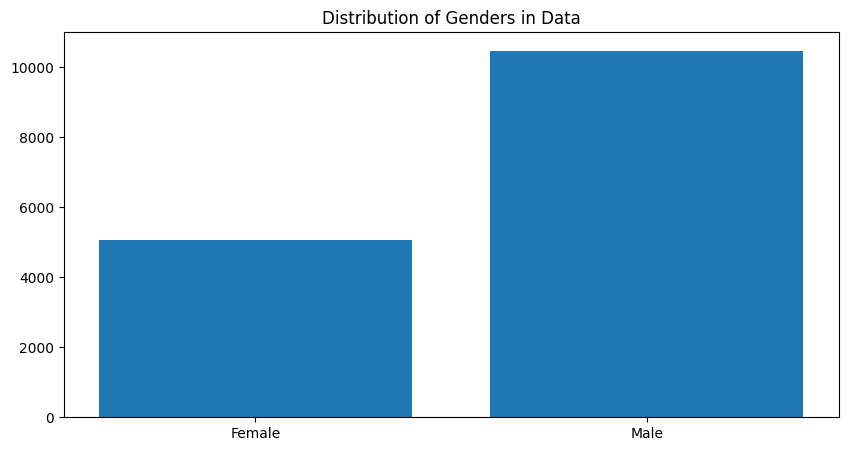

In [ ]:
# simple gender distribution
data = {'Female': final_df['meta.gender'].value_counts()['f'],
        'Male': final_df['meta.gender'].value_counts()['m']}
genders = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(genders, values)

plt.title("Distribution of Genders in Final Data")
plt.show()

In [ ]:
# getting convo data
convo_data = corpus.get_conversations_dataframe()
convo_data.head()

,vectors,meta.movie_idx,meta.movie_name,meta.release_year,meta.rating,meta.votes,meta.genre
id,,,,,,,
L1044,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L984,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L924,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L870,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"
L866,[],m0,10 things i hate about you,1999,6.90,62847,"['comedy', 'romance']"


In [ ]:
# fixing weird year anomoly
for index, convo in convo_data.iterrows():
  if '/' in convo['meta.release_year']:
    convo['meta.release_year'] = convo['meta.release_year'].split('/')[0]

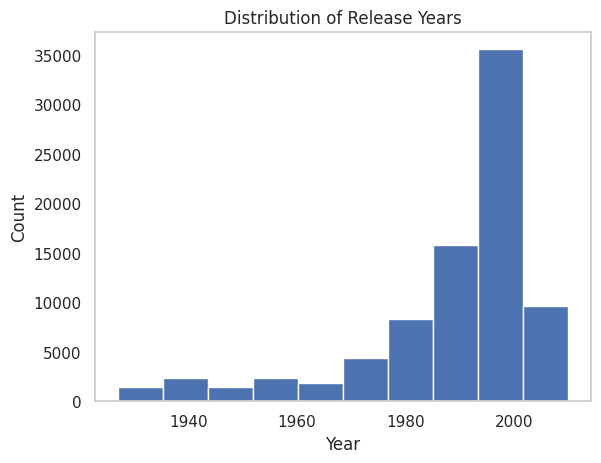

In [ ]:
# plotting distribution of release years
convo_data['meta.release_year'] = convo_data['meta.release_year'].astype(float)
pd.DataFrame.hist(convo_data, column='meta.release_year')
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(which='both', color='none')

In [ ]:
# dropping unlabeled genders
#speaker_data.drop(speaker_data[speaker_data['meta.gender'] == "?"].index, inplace = True)
#speaker_data["meta.gender"].value_counts()

In [ ]:
# grouping genders for each movie genre
convo_data['meta.genre_first'] = convo_data['meta.genre'].map(lambda x: x.split(','))
convo_data['meta.genre_first'] = convo_data['meta.genre_first'].map(lambda x: x[0]) # get first genre from list
convo_data['meta.genre_first'] = convo_data['meta.genre_first'].map(lambda x: x.strip('[\''))
convo_data['meta.genre_first'] = convo_data['meta.genre_first'].map(lambda x: x.strip(']\''))

convo_data_short = convo_data[['meta.genre_first', 'meta.movie_name']]
speaker_data_short = speaker_data[['meta.gender', 'meta.movie_name']]
speaker_data_short = speaker_data_short[speaker_data_short['meta.gender'] != '?']
speaker_data_short['meta.gender'] = speaker_data_short['meta.gender'].map(lambda x: x.lower())

merged_df = pd.merge(convo_data_short, speaker_data_short, on='meta.movie_name')
merged_df['meta.genre_first'].value_counts()
genre_gender_counts = merged_df.groupby(['meta.genre_first','meta.gender']).size().reset_index(name='Count')
genre_gender_counts.head()

,meta.genre_first,meta.gender,Count
0,,f,222
1,,m,111
2,action,f,22667
3,action,m,61326
4,adventure,f,2843


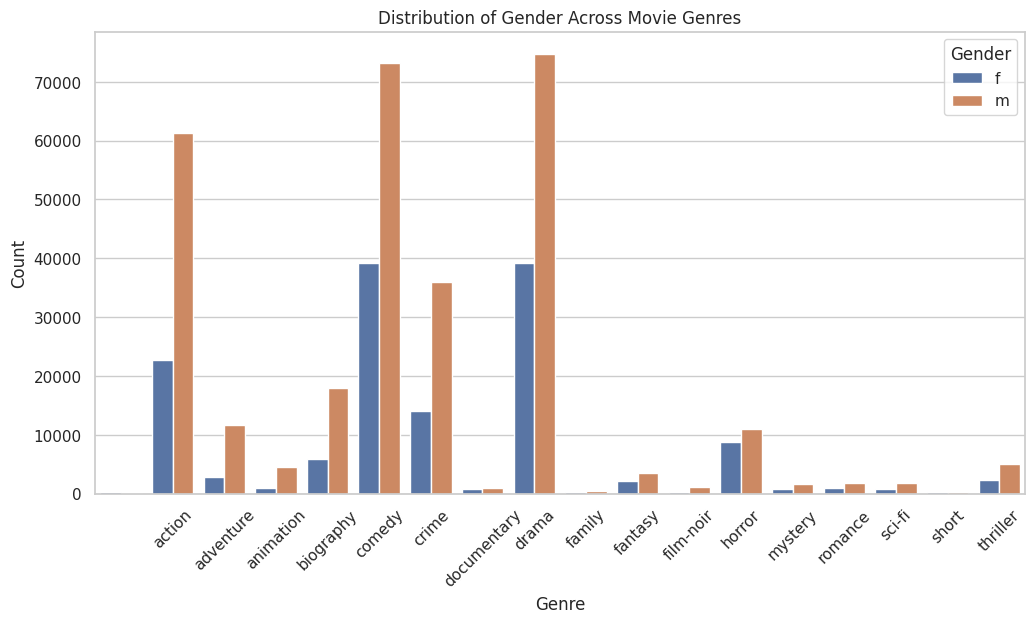

In [ ]:
# plotting gender across genre using first in list
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='meta.genre_first', y='Count', hue='meta.gender', data=genre_gender_counts)
plt.title('Distribution of Gender Across Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

<Figure size 1000x2400 with 0 Axes>

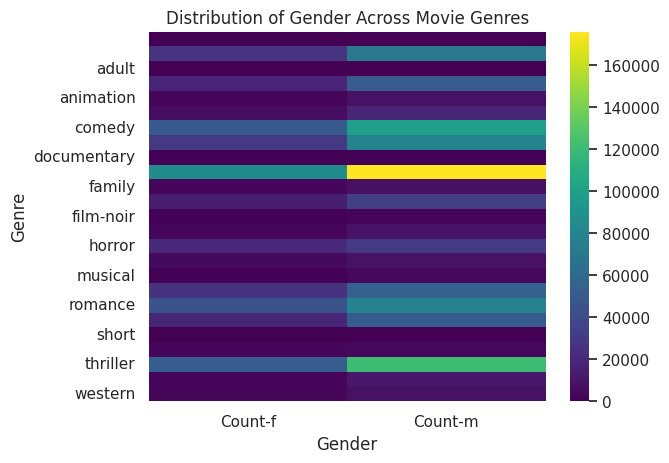

<Figure size 1000x2400 with 0 Axes>

In [ ]:
# creating heatmap not plotting all genres for some reason?
convo_data['meta.genre_expand'] = convo_data['meta.genre'].map(lambda x: x.split(','))
convo_data_unpacked = convo_data.explode('meta.genre_expand')
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip('['))
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip(']'))
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip('\''))
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip('\' '))

convo_data_unpacked_short = convo_data_unpacked[['meta.genre_expand', 'meta.movie_name', 'meta.release_year']]

merged_df = pd.merge(convo_data_unpacked_short, speaker_data_short, on='meta.movie_name')
genre_gender_counts = merged_df.groupby(['meta.genre_expand','meta.gender']).size().reset_index(name='Count')
genre_gender_counts

pivot_table = genre_gender_counts.pivot_table(index='meta.genre_expand', columns='meta.gender', fill_value=0)
sns.heatmap(pivot_table, cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Genre')
plt.title('Distribution of Gender Across Movie Genres')
plt.figure(figsize=(10, 24))

In [ ]:
# expanding genre list and getting percent
genre_gender_counts['meta.genre_expand'].unique()
genre_gender_counts

total_counts = genre_gender_counts.groupby('meta.genre_expand')['Count'].sum()
genre_gender_counts = genre_gender_counts.merge(total_counts, left_on='meta.genre_expand', right_index=True, suffixes=('', '_total'))
genre_gender_counts['percentage'] = (genre_gender_counts['Count'] / genre_gender_counts['Count_total']) * 100

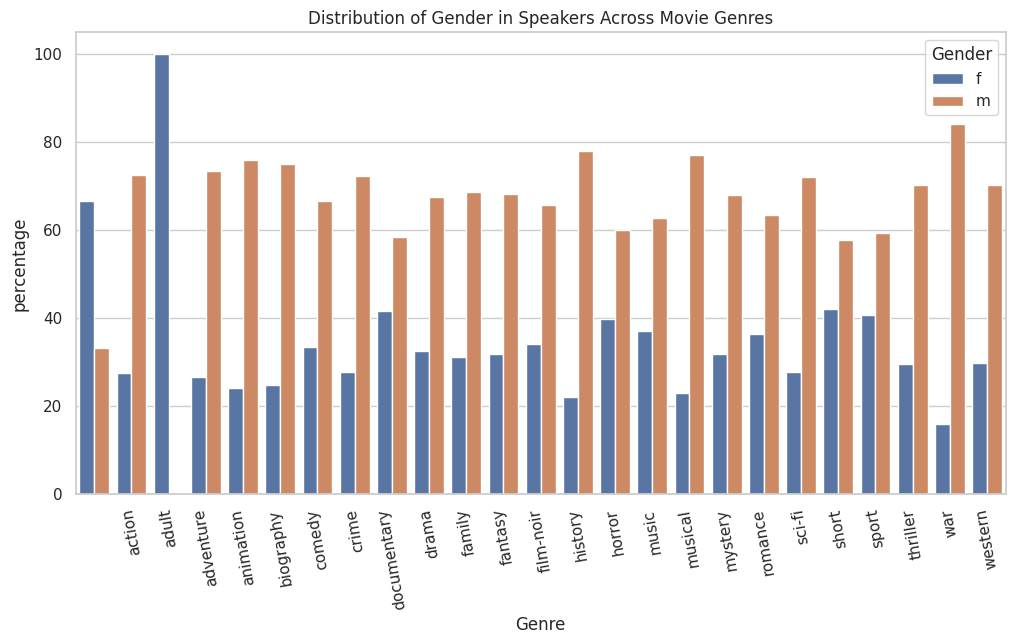

In [ ]:
# bar plot but expanded
plt.figure(figsize=(12, 6))
sns.barplot(x='meta.genre_expand', y='percentage', hue='meta.gender', data=genre_gender_counts)
plt.title('Distribution of Gender in Speakers Across Movie Genres')
plt.xlabel('Genre')
plt.ylabel('percentage')
plt.xticks(rotation=100)
plt.legend(title='Gender')
plt.show()

In [ ]:
from pandas._libs.tslibs.offsets import YearBegin
# isolating horror genre
convo_data_horror = convo_data[convo_data['meta.genre_first'] == 'horror']
convo_data_short = convo_data[['meta.release_year', 'meta.movie_name']]
convo_horror_short = convo_data_horror[['meta.release_year', 'meta.movie_name']]

speaker_data_short = speaker_data[['meta.gender', 'meta.movie_name']]
speaker_data_short = speaker_data_short[speaker_data_short['meta.gender'] != '?']
speaker_data_short['meta.gender'] = speaker_data_short['meta.gender'].map(lambda x: x.lower())

# repeating but for release year
merged_df = pd.merge(convo_data_unpacked_short, speaker_data_short, on='meta.movie_name')
merged_df['meta.release_year'].value_counts()

year_gender_counts = merged_df.groupby(['meta.release_year','meta.gender']).size().reset_index(name='Count')
year_gender_counts['meta.release_year'] = year_gender_counts['meta.release_year'] - year_gender_counts['meta.release_year'] % 5
year_gender_counts = year_gender_counts.groupby(['meta.release_year','meta.gender']).sum().reset_index()

# getting release year gender percents
total_counts = year_gender_counts.groupby(['meta.release_year'])['Count'].sum()
year_gender_counts = year_gender_counts.merge(total_counts, on='meta.release_year', suffixes=('', '_total'))
year_gender_counts['percentage'] = (year_gender_counts['Count'] / year_gender_counts['Count_total']) * 100
year_gender_counts.fillna(0, inplace=True)

# genre + year analysis
genre_year_counts = merged_df.groupby(['meta.release_year', 'meta.genre_expand', 'meta.gender']).size().reset_index(name='Count')
genre_year_counts['meta.release_year'] = genre_year_counts['meta.release_year'] - genre_year_counts['meta.release_year'] % 5
genre_year_counts = genre_year_counts.groupby(['meta.release_year','meta.genre_expand', 'meta.gender'])['Count'].sum().reset_index()

total_counts = genre_year_counts.groupby(['meta.genre_expand', 'meta.release_year'])['Count'].sum()
genre_year_counts = genre_year_counts.merge(total_counts, left_on=['meta.genre_expand', 'meta.release_year'], right_index=True, suffixes=('', '_total'))
genre_year_counts['percentage'] = (genre_year_counts['Count'] / genre_year_counts['Count_total']) * 100
genre_year_counts.fillna(0, inplace=True)
genre_year_counts.rename(columns={'meta.genre_expand': 'genre'}, inplace=True)
genre_year_counts.rename(columns={'meta.release_year': 'release year'}, inplace=True)
genre_year_counts.head()

,release year,genre,meta.gender,Count,Count_total,percentage
0,1925.0,adventure,f,92,92,100.000000
1,1925.0,drama,f,92,92,100.000000
2,1925.0,sci-fi,f,92,92,100.000000
3,1930.0,comedy,f,2378,5770,41.213172
4,1930.0,comedy,m,3392,5770,58.786828


<Figure size 1200x600 with 0 Axes>

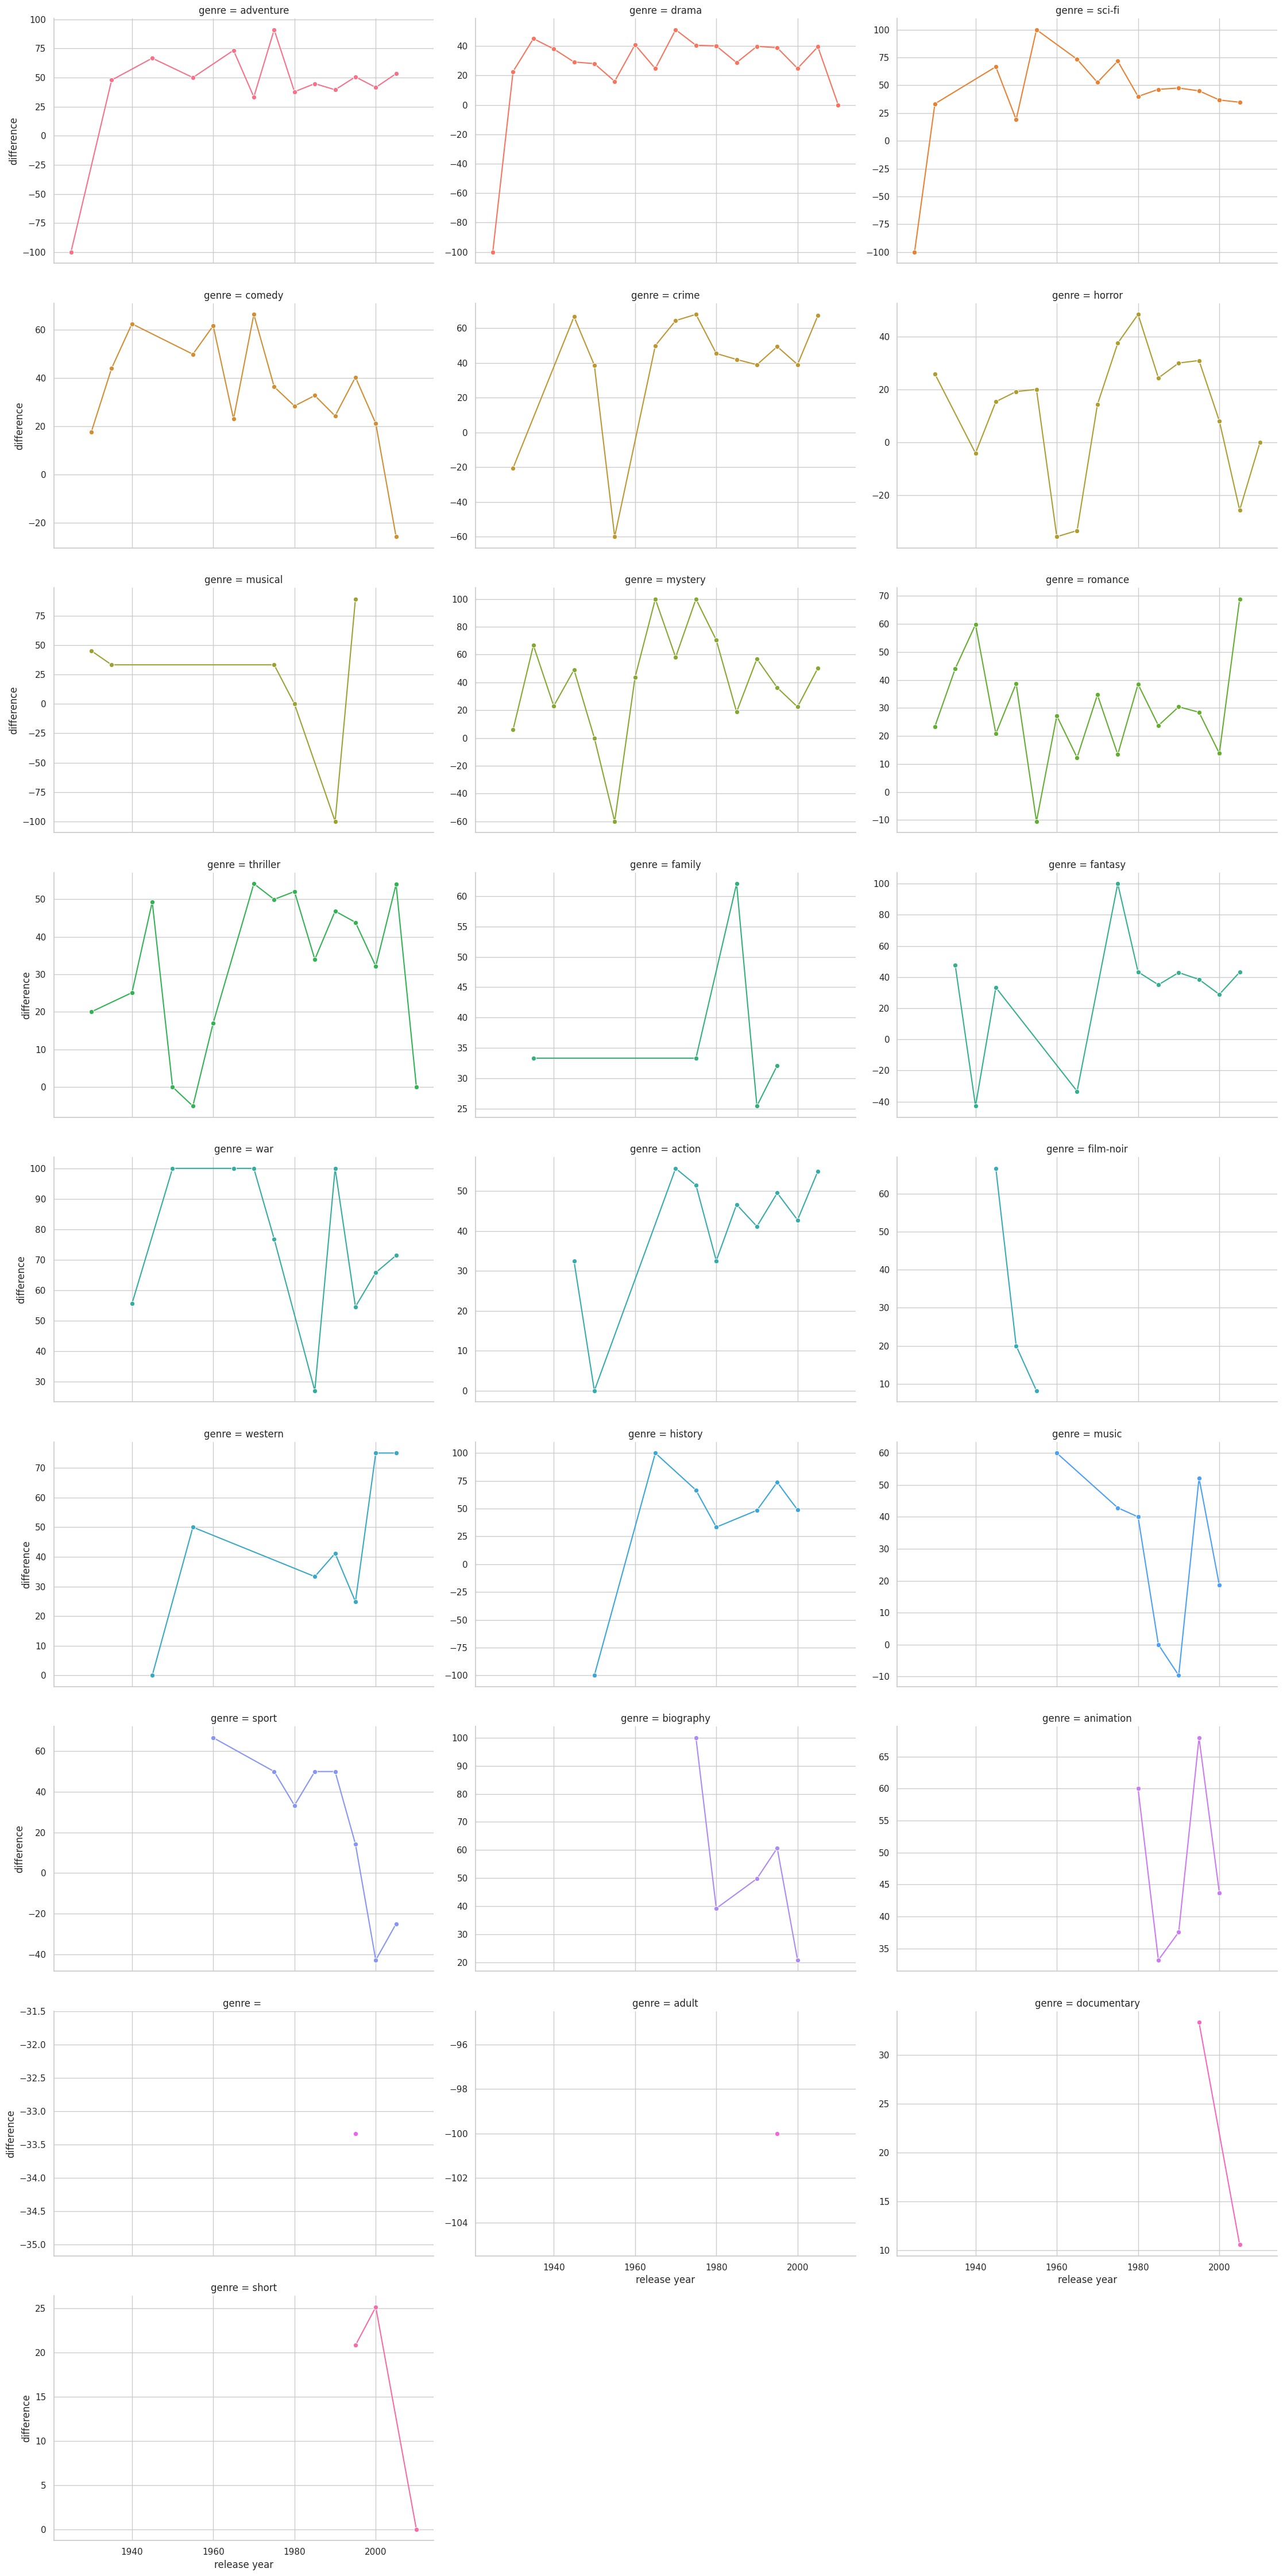

In [ ]:
#lineplot of all genres and release years
pivot_df = genre_year_counts.pivot(index=['release year', 'genre'], columns='meta.gender', values='percentage').reset_index()
pivot_df.fillna(0, inplace=True)
pivot_df['difference'] = pivot_df['m'] - pivot_df['f']
pivot_df.head()

# Set plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(pivot_df, col="genre", hue ="genre", col_wrap=3, sharey=False,  height=5, aspect=1.5)
g.map(sns.lineplot, "release year", "difference", marker="o")
plt.tight_layout()
plt.show()

In [ ]:
# difference in gender distribution for horror genre
merged_df = pd.merge(convo_horror_short, speaker_data_short, on='meta.movie_name')
merged_df['meta.release_year'].value_counts()
year_gender_counts_horror = merged_df.groupby(['meta.release_year','meta.gender']).size().reset_index(name='Count')
year_gender_counts_horror['meta.release_year'] = year_gender_counts_horror['meta.release_year'] - year_gender_counts_horror['meta.release_year'] % 5
year_gender_counts_horror = year_gender_counts_horror.groupby(['meta.release_year','meta.gender']).sum().reset_index()
year_gender_counts_horror.head()

,meta.release_year,meta.gender,Count
0,1930.0,f,140
1,1930.0,m,210
2,1940.0,f,228
3,1940.0,m,152
4,1950.0,f,56


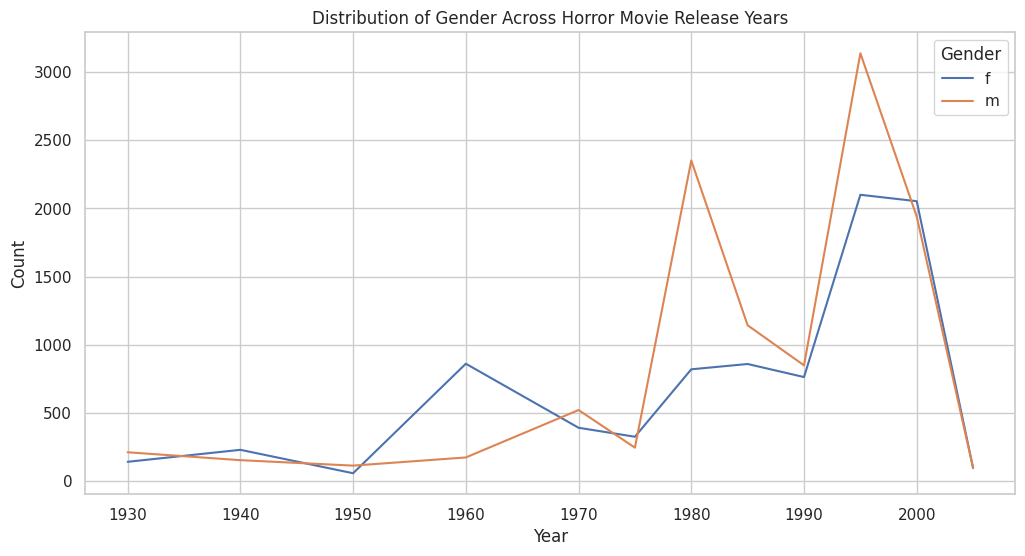

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='meta.release_year', y='Count', hue='meta.gender', data= year_gender_counts_horror)
plt.title('Distribution of Gender Across Horror Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend(title='Gender')
plt.show()

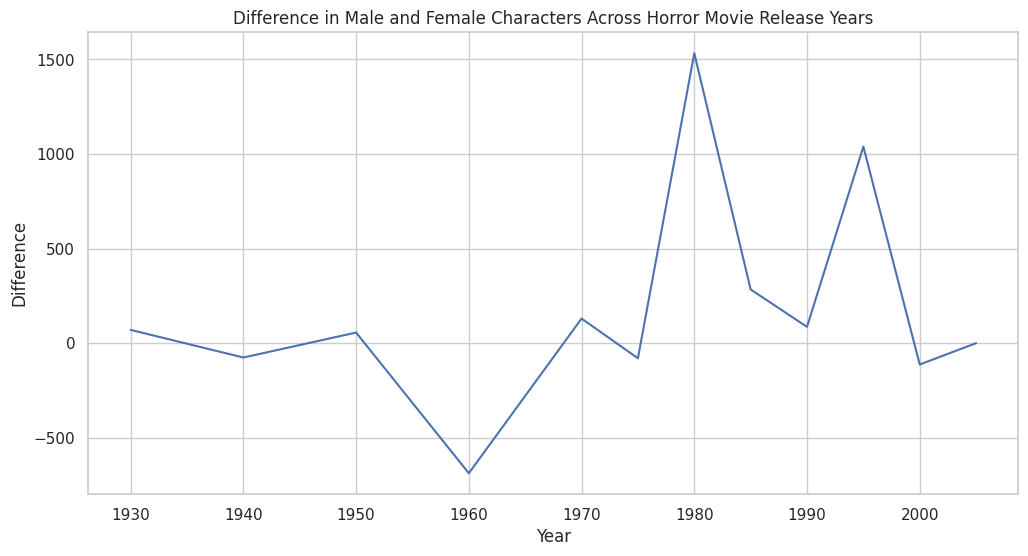

In [ ]:
# using difference in male/female
# creating scatterplot
pivot_df = year_gender_counts_horror.pivot(index='meta.release_year', columns='meta.gender', values='Count').reset_index()
pivot_df['difference'] = pivot_df['m'] - pivot_df['f']
pivot_df

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='meta.release_year', y='difference', data= pivot_df)
plt.title('Difference in Male and Female Characters Across Horror Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.show()

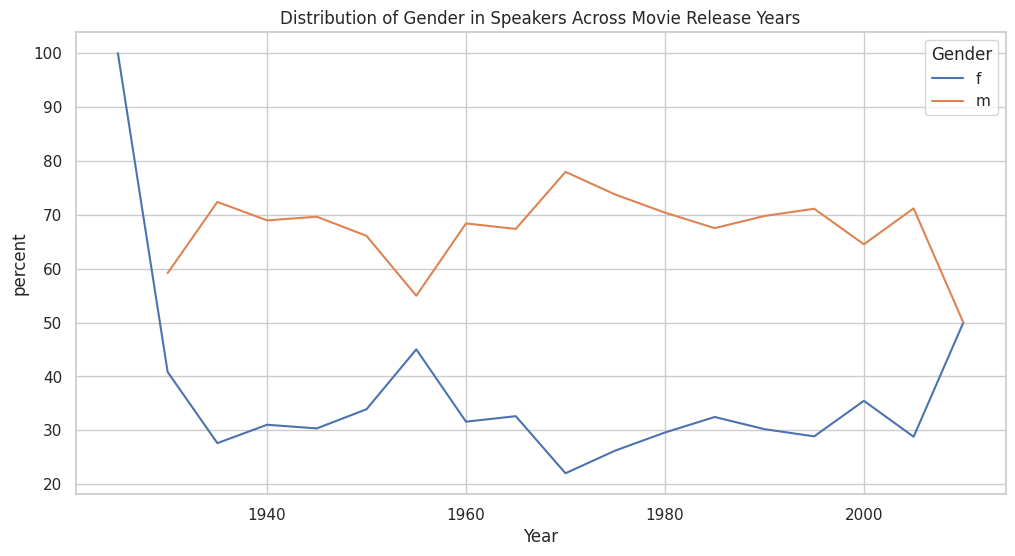

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='meta.release_year', y='percentage', hue='meta.gender', data= year_gender_counts)
plt.title('Distribution of Gender in Speakers Across Movie Release Years')
plt.xlabel('Year')
plt.ylabel('percent')
#plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
# adding genders to utterances
utter_data_orig['meta.gender'] = ''
print(speaker_data.loc[['u0']])
for index, row in utter_data_orig.iterrows():
  row['meta.gender'] = speaker_data.loc[row['speaker']]['meta.gender']
utter_data_orig.head()

   vectors meta.character_name meta.movie_idx             meta.movie_name  \
id                                                                          
u0      []              BIANCA             m0  10 things i hate about you   

   meta.gender meta.credit_pos  
id                              
u0           f               4  


,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors,meta.gender
id,,,,,,,,,
L1045,None,They do not!,u0,L1044,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],f
L1044,None,They do to!,u2,None,L1044,m0,"[{'rt': 1, 'toks': [{'tok': 'They', 'tag': 'PR...",[],m
L985,None,I hope so.,u0,L984,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[],f
L984,None,She okay?,u2,None,L984,m0,"[{'rt': 1, 'toks': [{'tok': 'She', 'tag': 'PRP...",[],m
L925,None,Let's go.,u0,L924,L924,m0,"[{'rt': 0, 'toks': [{'tok': 'Let', 'tag': 'VB'...",[],f


In [ ]:
# repeating but comparing utterances (change to expanded genre)

convo_data['meta.genre_expand'] = convo_data['meta.genre'].map(lambda x: x.split(','))
convo_data_unpacked = convo_data.explode('meta.genre_expand')
convo_data_unpacked = convo_data_unpacked.rename(columns={"meta.movie_idx": "meta.movie_id"})
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip('['))
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip(']'))
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip('\''))
convo_data_unpacked['meta.genre_expand'] = convo_data_unpacked['meta.genre_expand'].map(lambda x: x.strip('\' '))

convo_data_unpacked_short = convo_data_unpacked[['meta.genre_expand', 'meta.movie_id', 'meta.release_year']]
utter_data_short = utter_data_orig[['meta.gender', 'meta.movie_id']]
utter_data_short = utter_data_short[utter_data_short['meta.gender'] != '?']
utter_data_short['meta.gender'] = utter_data_short['meta.gender'].map(lambda x: x.lower())


merged_df = pd.merge(convo_data_unpacked_short, utter_data_short, on='meta.movie_id')
genre_gender_counts = merged_df.groupby(['meta.genre_expand','meta.gender']).size().reset_index(name='Count')
genre_gender_counts.head()

,meta.genre_expand,meta.gender,Count
0,,f,7104
1,,m,17094
2,action,f,1713501
3,action,m,5898776
4,adult,f,13640


In [ ]:
total_counts = genre_gender_counts.groupby('meta.genre_expand')['Count'].sum()
genre_gender_counts = genre_gender_counts.merge(total_counts, left_on='meta.genre_expand', right_index=True, suffixes=('', '_total'))
genre_gender_counts['percentage'] = (genre_gender_counts['Count'] / genre_gender_counts['Count_total']) * 100

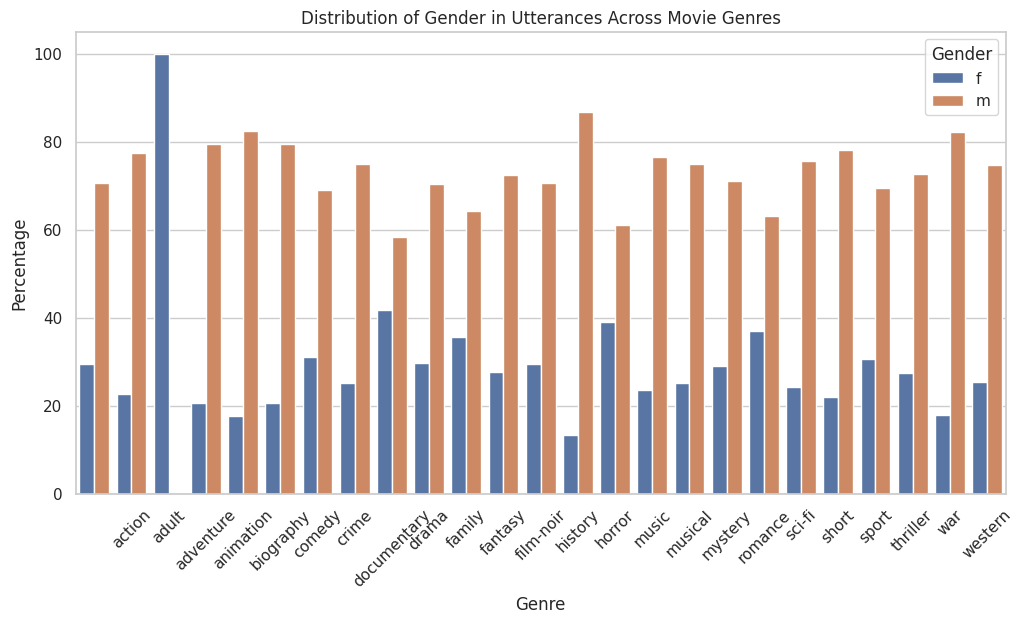

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='meta.genre_expand', y='percentage', hue='meta.gender', data=genre_gender_counts)
plt.title('Distribution of Gender in Utterances Across Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [ ]:
from pandas._libs.tslibs.offsets import YearBegin

# repeating but for release year
merged_df = pd.merge(convo_data_unpacked_short, utter_data_short, on='meta.movie_id')
merged_df['meta.release_year'].value_counts()

genre_year_counts = merged_df.groupby(['meta.release_year', 'meta.genre_expand', 'meta.gender']).size().reset_index(name='Count')
genre_year_counts['meta.release_year'] = genre_year_counts['meta.release_year'] - genre_year_counts['meta.release_year'] % 5
genre_year_counts = genre_year_counts.groupby(['meta.release_year','meta.genre_expand', 'meta.gender'])['Count'].sum().reset_index()

total_counts = genre_year_counts.groupby(['meta.genre_expand', 'meta.release_year'])['Count'].sum()
genre_year_counts = genre_year_counts.merge(total_counts, left_on=['meta.genre_expand', 'meta.release_year'], right_index=True, suffixes=('', '_total'))
genre_year_counts['percentage'] = (genre_year_counts['Count'] / genre_year_counts['Count_total']) * 100
genre_year_counts.fillna(0, inplace=True)
genre_year_counts.rename(columns={'meta.genre_expand': 'genre'}, inplace=True)
genre_year_counts.rename(columns={'meta.release_year': 'release year'}, inplace=True)
genre_year_counts.head()

,release year,genre,meta.gender,Count,Count_total,percentage
0,1925.0,adventure,f,2208,2208,100.000000
1,1925.0,drama,f,2208,2208,100.000000
2,1925.0,sci-fi,f,2208,2208,100.000000
3,1930.0,comedy,f,210742,526804,40.003872
4,1930.0,comedy,m,316062,526804,59.996128


<Figure size 1200x600 with 0 Axes>

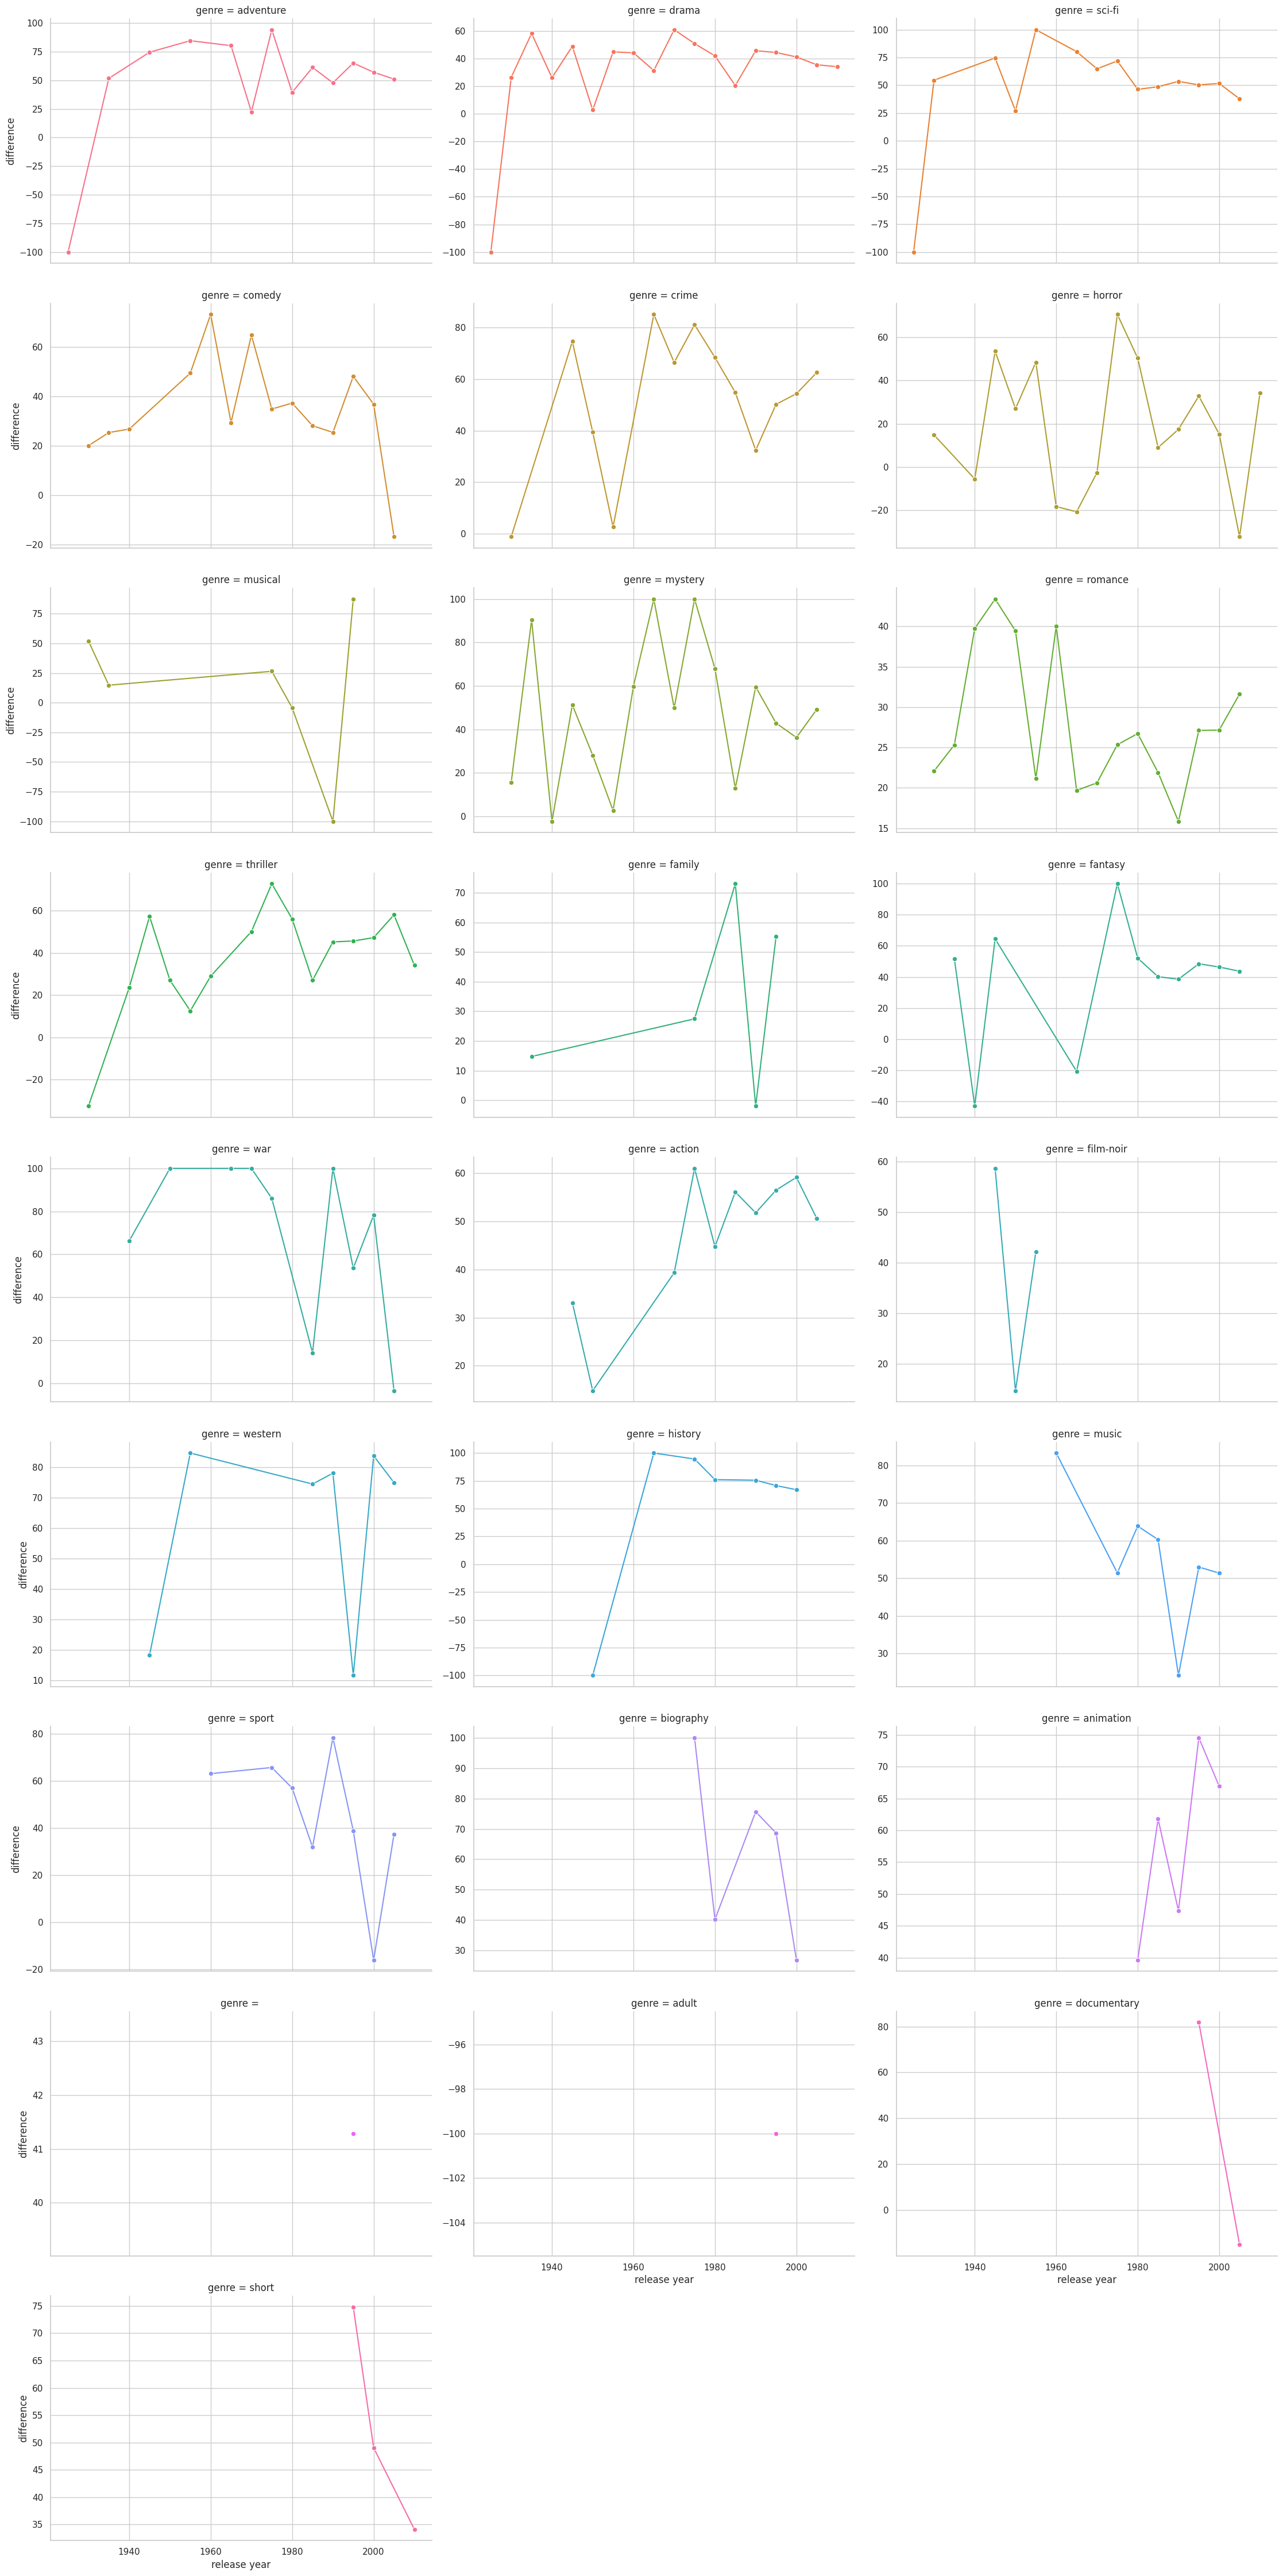

In [ ]:
#lineplot of all genres and release years
pivot_df = genre_year_counts.pivot(index=['release year', 'genre'], columns='meta.gender', values='percentage').reset_index()
pivot_df.fillna(0, inplace=True)
pivot_df['difference'] = pivot_df['m'] - pivot_df['f']
pivot_df.head()

# Set plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(pivot_df, col="genre", hue ="genre", col_wrap=3, sharey=False,  height=5, aspect=1.5)
g.map(sns.lineplot, "release year", "difference", marker="o")
plt.tight_layout()
plt.show()

In [ ]:
#convo_data = convo_data.rename(columns={"meta.movie_idx": "meta.movie_id"})
convo_data_short = convo_data[['meta.release_year', 'meta.movie_id']]
utter_data_short = utter_data_orig[['meta.gender', 'meta.movie_id']]
utter_data_short = utter_data_short[utter_data_short['meta.gender'] != '?']
utter_data_short['meta.gender'] = utter_data_short['meta.gender'].map(lambda x: x.lower())

merged_df = pd.merge(convo_data_short, utter_data_short, on='meta.movie_id')
merged_df['meta.release_year'].value_counts()
year_gender_counts = merged_df.groupby(['meta.release_year','meta.gender']).size().reset_index(name='Count')
year_gender_counts['meta.release_year'] = year_gender_counts['meta.release_year'] - year_gender_counts['meta.release_year'] % 5
year_gender_counts = year_gender_counts.groupby(['meta.release_year','meta.gender']).sum().reset_index()

total_counts = year_gender_counts.groupby(['meta.release_year'])['Count'].sum()
year_gender_counts = year_gender_counts.merge(total_counts, on='meta.release_year', suffixes=('', '_total'))
year_gender_counts['percentage'] = (year_gender_counts['Count'] / year_gender_counts['Count_total']) * 100
year_gender_counts.fillna(0, inplace=True)

year_gender_counts.head()

<ipython-input-93-dc294adf942b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utter_data_short['meta.gender'] = utter_data_short['meta.gender'].map(lambda x: x.lower())


,meta.release_year,meta.gender,Count,Count_total,percentage
0,1925.0,f,2208,2208,100.000000
1,1930.0,f,285407,769970,37.067288
2,1930.0,m,484563,769970,62.932712
3,1935.0,f,233865,725587,32.231145
4,1935.0,m,491722,725587,67.768855


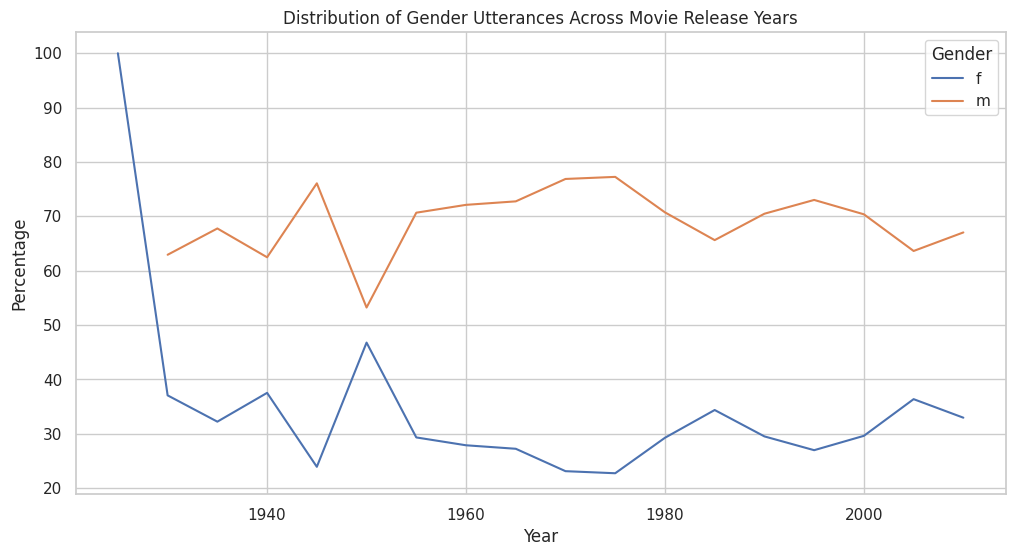

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='meta.release_year', y='percentage', hue='meta.gender', data=year_gender_counts)
plt.title('Distribution of Gender Utterances Across Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.show()

In [ ]:
final_df = pd.read_csv("final_df.csv")

In [ ]:
# isolating female speakers and their utterances
fem_speakers = speaker_data.loc[(speaker_data['meta.gender'] == 'f') | (speaker_data['meta.gender'] == 'F')]
fem_utterances_orig = utter_data[utter_data["speaker"].isin(fem_speakers.index)]
fem_utterances_orig.head()

,speaker,text
0,u0,"[They do not!, I hope so., Let's go., Okay -- ..."
3,u100,[She died in her sleep three days ago. It was...
15,u1010,"[Then set out the good plates, we'll all have ..."
22,u1017,"[What'd you find, Kathy?, Who signed as his ""s..."
31,u1025,"[No., But we can get to the west side faster.,..."


In [ ]:
# isolating female speakers in final df
fem_final = final_df.loc[(final_df['meta.gender'] == 'f')]
fem_final.head()

,meta.movie_name,meta.character_name,text,meta.gender
0,10 things i hate about you,BIANCA,they do not! i hope so. let's go. okay -- you'...,f
2,10 things i hate about you,CHASTITY,you think you ' re the only sophomore at the p...,f
4,10 things i hate about you,KAT,perm? it's just you. what? to completely damag...,f
9,10 things i hate about you,MANDELLA,william - he asked me to meet him here. have y...,f
10,10 things i hate about you,MISS PERKY,"just smack her now. no ... i believe ""heinous ...",f


In [ ]:
import string
print(string.punctuation)
def filter_tokens(tokens):
    filtered_tokens = []
    for token in tokens:
        # Skip if token is whitespace, punctuation, or an apostrophe
        if token == '' or token == '``' or token in string.punctuation:
            continue
        filtered_tokens.append(token)
    return filtered_tokens


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# getting token counts per speaker
print(fem_utterances_orig.shape)
fem_utterances_orig['text'] = fem_utterances_orig['text'].map(str)
fem_utterances_orig['text'] = fem_utterances_orig['text'].apply(lambda x: word_tokenize(x))
fem_utterances_orig['text'] = fem_utterances_orig['text'].apply(lambda x: filter_tokens(x))
fem_utterances_orig['token_count'] = fem_utterances_orig['text'].apply(lambda x: len(x))
fem_utterances_orig['token_count'].describe()

(966, 2)


<ipython-input-23-078432aaba67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_utterances_orig['text'] = fem_utterances_orig['text'].map(str)
<ipython-input-23-078432aaba67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_utterances_orig['text'] = fem_utterances_orig['text'].apply(lambda x: word_tokenize(x))
<ipython-input-23-078432aaba67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

count     966.000000
mean      807.822981
std       744.037046
min        50.000000
25%       315.000000
50%       574.500000
75%      1023.750000
max      4868.000000
Name: token_count, dtype: float64

In [ ]:
fem_utterances_orig.head()

,speaker,text,token_count
0,u0,"['They, do, not, I, hope, so, Let, 's, go, Oka...",1047
3,u100,"['She, died, in, her, sleep, three, days, ago,...",234
15,u1010,"[Then, set, out, the, good, plates, we, 'll, a...",1007
22,u1017,"[What, 'd, you, find, Kathy, 'Who, signed, as,...",2305
31,u1025,"['No, 'But, we, can, get, to, the, west, side,...",805


In [ ]:
# getting token counts per female speaker in final
print(fem_final.shape)
fem_final['text'] = fem_final['text'].astype(str)
fem_final['text'] = fem_final['text'].apply(lambda x: word_tokenize(x))
fem_final['text'] = fem_final['text'].apply(lambda x: filter_tokens(x))
fem_final['token_count'] = fem_final['text'].apply(len)
fem_final['token_count'].describe()

(5070, 4)


<ipython-input-25-88c09e04a0c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_final['text'] = fem_final['text'].astype(str)
<ipython-input-25-88c09e04a0c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_final['text'] = fem_final['text'].apply(lambda x: word_tokenize(x))
<ipython-input-25-88c09e04a0c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

count    5070.000000
mean      484.942998
std       783.548309
min         1.000000
25%        80.000000
50%       192.000000
75%       529.000000
max      9383.000000
Name: token_count, dtype: float64

In [ ]:
fem_final.head()

,meta.movie_name,meta.character_name,text,meta.gender,token_count
0,10 things i hate about you,BIANCA,"[they, do, not, i, hope, so, let, 's, go, okay...",f,1042
2,10 things i hate about you,CHASTITY,"[you, think, you, re, the, only, sophomore, at...",f,65
4,10 things i hate about you,KAT,"[perm, it, 's, just, you, what, to, completely...",f,1271
9,10 things i hate about you,MANDELLA,"[william, he, asked, me, to, meet, him, here, ...",f,170
10,10 things i hate about you,MISS PERKY,"[just, smack, her, now, no, ..., i, believe, h...",f,171


In [ ]:
#isolating speakers such that they spoke at least 315 tokens (first quartile)
fem_group = fem_utterances_orig[fem_utterances_orig['token_count'] > 315]
print(fem_group.shape)
fem_group.head()

(722, 3)


,speaker,text,token_count
0,u0,"['They, do, not, I, hope, so, Let, 's, go, Oka...",1047
15,u1010,"[Then, set, out, the, good, plates, we, 'll, a...",1007
22,u1017,"[What, 'd, you, find, Kathy, 'Who, signed, as,...",2305
31,u1025,"['No, 'But, we, can, get, to, the, west, side,...",805
49,u1041,"['He, always, has, to, make, the, big, entranc...",917


In [ ]:
fem_group['token_count'].describe()

count     722.000000
mean     1008.012465
std       761.993172
min       317.000000
25%       488.000000
50%       768.500000
75%      1232.750000
max      4868.000000
Name: token_count, dtype: float64

In [ ]:
fem_group_min = fem_utterances_orig[fem_utterances_orig['token_count'] <= 315]
print(fem_group_min.shape)
fem_group_min.head()

(244, 3)


,speaker,text,token_count
3,u100,"['She, died, in, her, sleep, three, days, ago,...",234
141,u1124,"[You, 're, very, brave, Louis, Good, luck, I, ...",204
187,u1166,"['You, teach, them, 'Your, daughters, need, mo...",162
199,u1177,"['When, did, you, two, talk, this, over, 'Well...",265
201,u1179,"[I, 'll, be, there, in, an, hour, 'Give, me, a...",103


In [ ]:
fem_group_min['token_count'].describe()

count    244.000000
mean     215.459016
std       64.961863
min       50.000000
25%      168.500000
50%      221.500000
75%      269.250000
max      315.000000
Name: token_count, dtype: float64

In [ ]:
# repeating for final fems
fem_group_final = fem_final[fem_final['token_count'] > 80]
print(fem_group_final.shape)
print(fem_group_final['token_count'].describe())
fem_group_final.head()

fem_min_final = fem_final[fem_final['token_count'] <= 80]
print(fem_min_final.shape)
print(fem_min_final['token_count'].describe())
fem_min_final.head()

(3790, 5)
count    3790.000000
mean      632.622164
std       857.217567
min        81.000000
25%       150.250000
50%       311.000000
75%       731.750000
max      9383.000000
Name: token_count, dtype: float64
(1280, 5)
count    1280.000000
mean       47.674219
std        19.047801
min         1.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: token_count, dtype: float64


,meta.movie_name,meta.character_name,text,meta.gender,token_count
2,10 things i hate about you,CHASTITY,"[you, think, you, re, the, only, sophomore, at...",f,65
11,10 things i hate about you,SHARON,"[absolutely, not, your, daughters, went, to, t...",f,51
13,1492: conquest of paradise,SAILOR,"[we, left, three, weeks, ago, alonso, ca, n't,...",f,34
43,15 minutes,MAGGIE,"[you, want, the, tape, there, it, is, trust, m...",f,23
45,15 minutes,MAX,"[hey, by, the, way, i, 'm, really, sorry, abou...",f,38


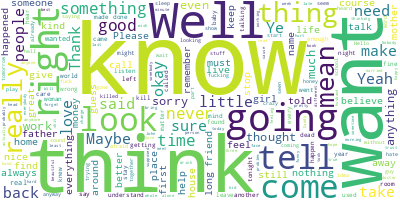

In [ ]:
# preprocessing
all_tokens = ' '.join(fem_utterances_orig['text'].apply(lambda tokens: ' '.join(token for token in tokens if len(token) > 3 and token not in stoplist)))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_tokens)
# Visualize the word cloud
wordcloud.to_image()

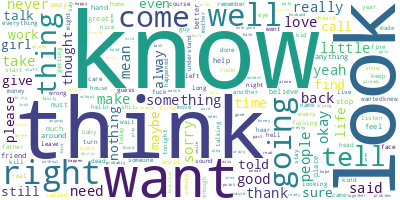

In [ ]:
# preprocessing
all_tokens = ' '.join(fem_final['text'].apply(lambda tokens: ' '.join(token for token in tokens if len(token) > 3 and token not in stoplist)))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(all_tokens)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# preprocessing for LDA
import gensim
from gensim.utils import simple_preprocess


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stoplist] for doc in texts]

data = fem_utterances_orig.text.values.tolist()
#data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data)
print(data_words[0])


['hope', 'let', 'go', 'okay', 'gon', 'na', 'need', 'learn', 'lie', 'kidding', 'know', 'sometimes', 'become', 'persona', 'know', 'quit', 'like', 'fear', 'wearing', 'pastels', 'good', 'stuff', 'endless', 'blonde', 'babble', 'like', 'boring', 'listen', 'crap', 'guillermo', 'says', 'go', 'lighter', 'gon', 'na', 'look', 'like', 'extra', 'well', 'tons', 'know', 'chastity', 'hi', 'knows', 'ever', 'heard', 'say', 'dip', 'dating', 'guy', 'smokes', 'lesbian', 'found', 'picture', 'jared', 'leto', 'one', 'drawers', 'pretty', 'sure', 'harboring', 'sex', 'tendencies', 'really', 'really', 'really', 'wan', 'na', 'go', 'ca', 'unless', 'sister', 'goes', 'eber', 'deep', 'conditioner', 'every', 'two', 'days', 'never', 'ever', 'use', 'blowdryer', 'without', 'diffuser', 'attachment', 'sweet', 'counted', 'help', 'cause', 'thug', 'obviously', 'failing', 'ever', 'going', 'date', 'little', 'find', 'wench', 'date', 'plan', 'progressing', 'forget', 'french', 'want', 'know', 'say', 'though', 'want', 'know', 'usefu

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.018*"know" + 0.011*"like" + 0.010*"oh" + 0.010*"want" + 0.009*"think" + '
  '0.009*"right" + 0.009*"going" + 0.008*"go" + 0.007*"get" + 0.007*"got"'),
 (1,
  '0.018*"know" + 0.012*"like" + 0.009*"get" + 0.009*"want" + 0.008*"go" + '
  '0.008*"oh" + 0.008*"got" + 0.007*"think" + 0.007*"going" + 0.006*"see"'),
 (2,
  '0.015*"know" + 0.014*"like" + 0.010*"think" + 0.008*"want" + 0.008*"would" '
  '+ 0.008*"got" + 0.007*"right" + 0.007*"ca" + 0.007*"get" + 0.007*"go"'),
 (3,
  '0.015*"know" + 0.013*"like" + 0.011*"get" + 0.011*"oh" + 0.010*"want" + '
  '0.009*"well" + 0.009*"think" + 0.008*"go" + 0.007*"got" + 0.006*"could"'),
 (4,
  '0.014*"know" + 0.011*"like" + 0.009*"one" + 0.008*"yes" + 0.008*"want" + '
  '0.007*"get" + 0.006*"would" + 0.006*"think" + 0.006*"go" + 0.006*"tell"'),
 (5,
  '0.012*"know" + 0.011*"like" + 0.010*"want" + 0.009*"go" + 0.009*"oh" + '
  '0.008*"get" + 0.008*"think" + 0.007*"one" + 0.007*"would" + 0.007*"going"'),
 (6,
  '0.020*"know" + 0.012*"get" + 

In [ ]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97717 sha256=581f7938eea1326113d9a2adb9a047c5b83087265ab2fc57d48306ba94d8e60c
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Visualize the topics
pyLDAvis.enable_notebook()
num_topics = 10
LDAvis_data_filepath = '/content/drive/My Drive/results'

# Check if the file exists before attempting to load it
if os.path.exists(LDAvis_data_filepath):
    # Load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
else:
    # Generate the pyLDAvis data and save it
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Save the HTML visualization
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/My Drive/results')

# Display the prepared pyLDAvis data
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.002387 -0.006322       1        1  22.336201
3     -0.004184 -0.000543       2        1  16.283521
0     -0.007753  0.001466       3        1  11.633063
9     -0.000484  0.000071       4        1  11.507222
8      0.000237 -0.004936       5        1   9.835244
5      0.001104  0.000610       6        1   9.100864
6     -0.001298 -0.001582       7        1   8.280371
1     -0.000940  0.000701       8        1   5.674957
7     -0.000683  0.010516       9        1   2.717778
4      0.016388  0.000019      10        1   2.630781, topic_info=      Term         Freq        Total Category  logprob  loglift
142   know  5062.000000  5062.000000  Default  30.0000  30.0000
191    one  1979.000000  1979.000000  Default  29.0000  29.0000
96     get  2883.000000  2883.000000  Default  28.0000  28.0000
154   like  3756.000000  3756.000000  Default  27.0000  27.0000
99      go  2337.000000  2337.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
223  right    34.192295  2080.217542  Topic10  -5.5034  -0.4703
358   back    27.798368  1293.001627  Topic10  -5.7104  -0.2019
183  never    28.353737  1433.041577  Topic10  -5.6906  -0.2849
167   mean    27.254408  1278.021349  Topic10  -5.7301  -0.2100
106    got    29.312597  2155.043616  Topic10  -5.6573  -0.6597

[792 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
20977      3  0.558032    aaagh
7509       5  0.579957      abe
17953      1  0.330708    abort
17953      4  0.330708    abort
9903       1  0.073229  admiral
...      ...       ...      ...
17640      2  0.438577     zeke
17640      3  0.146192     zeke
17572      2  0.258324      zoe
17572      5  0.258324      zoe
17572      9  0.258324      zoe

[1779 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 10, 9, 6, 7, 2, 8, 5])

In [ ]:
fem_group.head()

,speaker,text,token_count
0,u0,"['They, do, not, I, hope, so, Let, 's, go, Oka...",1047
15,u1010,"[Then, set, out, the, good, plates, we, 'll, a...",1007
22,u1017,"[What, 'd, you, find, Kathy, 'Who, signed, as,...",2305
31,u1025,"['No, 'But, we, can, get, to, the, west, side,...",805
49,u1041,"['He, always, has, to, make, the, big, entranc...",917


In [ ]:
# extracting n grams without stopword removal
cvec_fem = CountVectorizer(ngram_range=(1,3))
fem_group['text'] = fem_group['text'].apply(lambda tokens: ' '.join(tokens))
ngrams = cvec_fem.fit_transform(fem_group['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_fem.vocabulary_
df_ngram_fem = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})

<ipython-input-41-694c2008f4f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_group['text'] = fem_group['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
df_ngram_fem.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,frequency,unigram/bigram/trigram
0,33288,you
1,17495,to
2,17405,the
3,14541,it
4,11024,do
5,9959,and
6,9689,that
7,8257,what
8,7882,me
9,7460,of


In [ ]:
# extracting n grams with stopword removal
cvec_fems = CountVectorizer(stop_words=stoplist, ngram_range=(1,3))
ngrams = cvec_fems.fit_transform(fem_group['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_fems.vocabulary_
# calculating polarity/ subjectivity
df_ngram_fems = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
df_ngram_fems['polarity'] = df_ngram_fems['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_fems['subjective'] = df_ngram_fems['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
fems_features = (cvec_fems.get_feature_names_out())

In [ ]:
print(tabulate(df_ngram_fems.head(20), headers='keys', tablefmt="fancy_grid"))

╒════╤═════════════╤══════════════════════════╤════════════╤══════════════╕
│    │   frequency │ unigram/bigram/trigram   │   polarity │   subjective │
╞════╪═════════════╪══════════════════════════╪════════════╪══════════════╡
│  0 │        5049 │ know                     │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  1 │        3581 │ like                     │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  2 │        2923 │ get                      │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  3 │        2682 │ want                     │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  4 │        2647 │ think                    │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  5 │      

In [ ]:
# isolating n-grams such that polarity and subjectivity are not both 0
df_ngram_fems1 = df_ngram_fems[(df_ngram_fems['polarity'] != 0.0) | (df_ngram_fems['subjective'] != 0.0)]

In [ ]:
print("Top 20 N-grams and Sentiment Analysis Scores for Prominent Female Speakers:")
print(tabulate(df_ngram_fems1.head(20), headers='keys', tablefmt="fancy_grid"))

Top 20 N-grams and Sentiment Analysis Scores for Prominent Female Speakers:
╒═════╤═════════════╤══════════════════════════╤════════════╤══════════════╕
│     │   frequency │ unigram/bigram/trigram   │   polarity │   subjective │
╞═════╪═════════════╪══════════════════════════╪════════════╪══════════════╡
│  11 │        1971 │ right                    │   0.285714 │    0.535714  │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  18 │        1394 │ good                     │   0.7      │    0.6       │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  22 │        1348 │ really                   │   0.2      │    0.2       │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  24 │        1280 │ mean                     │  -0.3125   │    0.6875    │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  30 │        1061 │ love                     │   0.5      │    0.6       │


In [ ]:
print(tabulate(df_ngram_fems1.head(20), headers='keys', tablefmt="latex", showindex = False))

\begin{tabular}{rlrr}
\hline
   frequency & unigram/bigram/trigram   &   polarity &   subjective \\
\hline
        1971 & right                    &   0.285714 &    0.535714  \\
        1394 & good                     &   0.7      &    0.6       \\
        1348 & really                   &   0.2      &    0.2       \\
        1280 & mean                     &  -0.3125   &    0.6875    \\
        1061 & love                     &   0.5      &    0.6       \\
        1060 & okay                     &   0.5      &    0.5       \\
         978 & little                   &  -0.1875   &    0.5       \\
         931 & sure                     &   0.5      &    0.888889  \\
         831 & much                     &   0.2      &    0.2       \\
         761 & sorry                    &  -0.5      &    1         \\
         590 & better                   &   0.5      &    0.5       \\
         570 & first                    &   0.25     &    0.333333  \\
         567 & last                     &

In [ ]:
# avg subjectivity and polarity
main_pol = []
main_sub = []
main_neutral = []
fems_len = len(df_ngram_fems['polarity'])
avg_pol = df_ngram_fems['polarity'].sum() / fems_len
avg_sub = df_ngram_fems['subjective'].sum() /  fems_len
avg_neutral = len(df_ngram_fems[(df_ngram_fems['polarity'] == 0.0) & (df_ngram_fems['subjective'] == 0.0)]) / fems_len
main_pol.append(avg_pol)
main_sub.append(avg_sub)
main_neutral.append(avg_neutral)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.02692216327273023
0.18338797128675355
0.6782836317857054


In [ ]:
# repeating for final df
cvec_fems_final = CountVectorizer(stop_words=stoplist, ngram_range=(1,3))
fem_group_final['text'] = fem_group_final['text'].apply(lambda tokens: ' '.join(tokens))
ngrams = cvec_fems_final.fit_transform(fem_group_final['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_fems_final.vocabulary_
# calculating polarity/ subjectivity
df_ngram_fems_final = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
df_ngram_fems_final['polarity'] = df_ngram_fems_final['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_fems_final['subjective'] = df_ngram_fems_final['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-52-140444b47ec9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_group_final['text'] = fem_group_final['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
fems_features_final = (cvec_fems_final.get_feature_names_out())

In [ ]:
df_ngram_fems_final1 = df_ngram_fems_final[(df_ngram_fems_final['polarity'] != 0.0) | (df_ngram_fems_final['subjective'] != 0.0)]

In [ ]:
print("Top 20 N-grams and Sentiment Analysis Scores for Prominent Female Speakers:")
print(tabulate(df_ngram_fems_final1.head(20), headers='keys', tablefmt="fancy_grid"))

Top 20 N-grams and Sentiment Analysis Scores for Prominent Female Speakers:
╒════╤═════════════╤══════════════════════════╤════════════╤══════════════╕
│    │   frequency │ unigram/bigram/trigram   │   polarity │   subjective │
╞════╪═════════════╪══════════════════════════╪════════════╪══════════════╡
│ 10 │        6177 │ right                    │   0.285714 │    0.535714  │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 15 │        4907 │ good                     │   0.7      │    0.6       │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 23 │        4184 │ really                   │   0.2      │    0.2       │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 27 │        3923 │ okay                     │   0.5      │    0.5       │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 33 │        3250 │ mean                     │  -0.3125   │    0.6875    │
├────┼──────

In [ ]:
print(tabulate(df_ngram_fems_final1.head(20), headers='keys', tablefmt="latex", showindex= False))

\begin{tabular}{rlrr}
\hline
   frequency & unigram/bigram/trigram   &   polarity &   subjective \\
\hline
        6177 & right                    &   0.285714 &    0.535714  \\
        4907 & good                     &   0.7      &    0.6       \\
        4184 & really                   &   0.2      &    0.2       \\
        3923 & okay                     &   0.5      &    0.5       \\
        3250 & mean                     &  -0.3125   &    0.6875    \\
        3085 & little                   &  -0.1875   &    0.5       \\
        3049 & love                     &   0.5      &    0.6       \\
        2830 & sorry                    &  -0.5      &    1         \\
        2625 & sure                     &   0.5      &    0.888889  \\
        2492 & much                     &   0.2      &    0.2       \\
        1872 & first                    &   0.25     &    0.333333  \\
        1814 & long                     &  -0.05     &    0.4       \\
        1795 & better                   &

In [ ]:
fems_final_len = len(df_ngram_fems_final['polarity'])
avg_pol = df_ngram_fems_final['polarity'].sum() / fems_final_len
avg_sub = df_ngram_fems_final['subjective'].sum() /  fems_final_len
avg_neutral = len(df_ngram_fems_final[(df_ngram_fems_final['polarity'] == 0.0) & (df_ngram_fems_final['subjective'] == 0.0)]) / fems_final_len
main_pol.append(avg_pol)
main_sub.append(avg_sub)
main_neutral.append(avg_neutral)
print(fems_final_len)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

1651427
0.02700043454668469
0.1800419680636252
0.6810667380392836


In [ ]:
# extracting n grams with stopword removal (minor speakers)
cvec_fems_min = CountVectorizer(stop_words=stoplist, ngram_range=(1,3))
fem_group_min['text'] = fem_group_min['text'].apply(lambda tokens: ' '.join(tokens))
ngrams = cvec_fems_min.fit_transform(fem_group_min['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_fems_min.vocabulary_
df_ngram_fems_min = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
df_ngram_fems_min['polarity'] = df_ngram_fems_min['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_fems_min['subjective'] = df_ngram_fems_min['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-75-5fceb410d474>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_group_min['text'] = fem_group_min['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
fems_features_min = (cvec_fems_min.get_feature_names_out())

In [ ]:
df_ngram_fems_min1 = df_ngram_fems_min[(df_ngram_fems_min['polarity'] != 0.0) | (df_ngram_fems_min['subjective'] != 0.0)]

In [ ]:
print(tabulate(df_ngram_fems_min1.head(20), headers='keys', tablefmt="fancy_grid"))

╒═════╤═════════════╤══════════════════════════╤════════════╤══════════════╕
│     │   frequency │ unigram/bigram/trigram   │   polarity │   subjective │
╞═════╪═════════════╪══════════════════════════╪════════════╪══════════════╡
│  11 │         150 │ right                    │   0.285714 │    0.535714  │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  17 │         124 │ good                     │   0.7      │    0.6       │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  21 │          94 │ really                   │   0.2      │    0.2       │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  31 │          77 │ little                   │  -0.1875   │    0.5       │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│  34 │          71 │ sure                     │   0.5      │    0.888889  │
├─────┼─────────────┼──────────────────────────┼────────────┼──────────────┤

In [ ]:
print(tabulate(df_ngram_fems_min1.head(20), headers='keys', tablefmt="latex", showindex=False))

\begin{tabular}{rlrr}
\hline
   frequency & unigram/bigram/trigram   &   polarity &   subjective \\
\hline
         150 & right                    &   0.285714 &    0.535714  \\
         124 & good                     &   0.7      &    0.6       \\
          94 & really                   &   0.2      &    0.2       \\
          77 & little                   &  -0.1875   &    0.5       \\
          71 & sure                     &   0.5      &    0.888889  \\
          70 & mean                     &  -0.3125   &    0.6875    \\
          68 & love                     &   0.5      &    0.6       \\
          67 & okay                     &   0.5      &    0.5       \\
          60 & much                     &   0.2      &    0.2       \\
          58 & sorry                    &  -0.5      &    1         \\
          50 & first                    &   0.25     &    0.333333  \\
          48 & nice                     &   0.6      &    1         \\
          44 & last                     &

In [ ]:
fems_min_len = len(df_ngram_fems_min['polarity'])
avg_pol = df_ngram_fems_min['polarity'].sum() / fems_min_len
avg_sub = df_ngram_fems_min['subjective'].sum() / fems_min_len
avg_neutral = len(df_ngram_fems_min[(df_ngram_fems_min['polarity'] == 0.0) & (df_ngram_fems_min['subjective'] == 0.0)]) / fems_min_len
main_pol.append(avg_pol)
main_sub.append(avg_sub)
main_neutral.append(avg_neutral)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.02984097110695945
0.17305981227916956
0.6965811027425836


In [ ]:
print(main_pol)
print(main_sub)
print(main_neutral)

[0.02692216327273023, 0.02700043454668469, 0.02984097110695945]
[0.18338797128675355, 0.1800419680636252, 0.17305981227916956]
[0.6782836317857054, 0.6810667380392836, 0.6965811027425836]


In [ ]:
# extracting n grams with stopword removal (minor final speakers)
cvec_fems_min_final = CountVectorizer(stop_words=stoplist, ngram_range=(1,3))
fem_min_final['text'] = fem_min_final['text'].apply(lambda tokens: ' '.join(tokens))
ngrams = cvec_fems_min_final.fit_transform(fem_min_final['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_fems_min_final.vocabulary_
df_ngram_fems_minfinal = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
df_ngram_fems_minfinal['polarity'] = df_ngram_fems_minfinal['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_fems_minfinal['subjective'] = df_ngram_fems_minfinal['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-83-d100391089f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_min_final['text'] = fem_min_final['text'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
fems_features_min_final = (cvec_fems_min_final.get_feature_names_out())

In [ ]:
df_ngram_fems_minfinal1 = df_ngram_fems_minfinal[(df_ngram_fems_min['polarity'] != 0.0) | (df_ngram_fems_minfinal['subjective'] != 0.0)]

In [ ]:
print(tabulate(df_ngram_fems_minfinal1.head(20), headers='keys', tablefmt="fancy_grid"))

╒════╤═════════════╤══════════════════════════╤════════════╤══════════════╕
│    │   frequency │ unigram/bigram/trigram   │   polarity │   subjective │
╞════╪═════════════╪══════════════════════════╪════════════╪══════════════╡
│ 11 │         169 │ right                    │   0.285714 │     0.535714 │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 17 │         138 │ good                     │   0.7      │     0.6      │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 21 │         121 │ back                     │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 22 │         117 │ okay                     │   0.5      │     0.5      │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 31 │          96 │ let                      │   0        │     0        │
├────┼─────────────┼──────────────────────────┼────────────┼──────────────┤
│ 32 │      

In [ ]:
print(tabulate(df_ngram_fems_min1.head(20), headers='keys', tablefmt="latex", showindex=False))

\begin{tabular}{rlrr}
\hline
   frequency & unigram/bigram/trigram   &   polarity &   subjective \\
\hline
         150 & right                    &   0.285714 &    0.535714  \\
         124 & good                     &   0.7      &    0.6       \\
          94 & really                   &   0.2      &    0.2       \\
          77 & little                   &  -0.1875   &    0.5       \\
          71 & sure                     &   0.5      &    0.888889  \\
          70 & mean                     &  -0.3125   &    0.6875    \\
          68 & love                     &   0.5      &    0.6       \\
          67 & okay                     &   0.5      &    0.5       \\
          60 & much                     &   0.2      &    0.2       \\
          58 & sorry                    &  -0.5      &    1         \\
          50 & first                    &   0.25     &    0.333333  \\
          48 & nice                     &   0.6      &    1         \\
          44 & last                     &

In [ ]:
fems_min_len = len(df_ngram_fems_minfinal['polarity'])
avg_pol = df_ngram_fems_minfinal['polarity'].sum() / fems_min_len
avg_sub = df_ngram_fems_minfinal['subjective'].sum() / fems_min_len
avg_neutral = len(df_ngram_fems_minfinal[(df_ngram_fems_minfinal['polarity'] == 0.0) & (df_ngram_fems_minfinal['subjective'] == 0.0)]) / fems_min_len
main_pol.append(avg_pol)
main_sub.append(avg_sub)
main_neutral.append(avg_neutral)
print(fems_min_len)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

54056
0.02720112607549941
0.15671007897876796
0.7267648364658872


In [ ]:
data = {'Group': ['Original Female', 'Final Female', 'Original Female Minor', 'Final Female Minor'],
        'Average Polarity': main_pol,
        'Average Subjectivity': main_sub,
        'Average Neutral': main_neutral}
female_stats = pd.DataFrame(data)
print(tabulate(female_stats, headers='keys', tablefmt="latex", showindex = False))

\begin{tabular}{lrrr}
\hline
 Group                 &   Average Polarity &   Average Subjectivity &   Average Neutral \\
\hline
 Original Female       &          0.0269222 &               0.183388 &          0.678284 \\
 Final Female          &          0.0270004 &               0.180042 &          0.681067 \\
 Original Female Minor &          0.029841  &               0.17306  &          0.696581 \\
 Final Female Minor    &          0.0272011 &               0.15671  &          0.726765 \\
\hline
\end{tabular}


In [ ]:
print(tabulate(female_stats, headers='keys', showindex=False))

Group                    Average Polarity    Average Subjectivity    Average Neutral
---------------------  ------------------  ----------------------  -----------------
Original Female                 0.0269222                0.183388           0.678284
Final Female                    0.0270004                0.180042           0.681067
Original Female Minor           0.029841                 0.17306            0.696581
Final Female Minor              0.0272011                0.15671            0.726765


In [ ]:
# isolating male speakers and their utterances
men_speakers = speaker_data.loc[(speaker_data['meta.gender'] == 'm') | (speaker_data['meta.gender'] == 'M')]
men_utterances_orig = utter_data[utter_data["speaker"].isin(men_speakers.index)]

In [ ]:
print(men_utterances_orig.shape)
agg_functions = {'text': 'sum'}
men_group_orig = men_utterances_orig.groupby(men_utterances_orig['speaker']).aggregate(agg_functions)
men_group_orig['text'] = men_group_orig['text'].map(str)
men_group_orig['text'].apply(lambda x: word_tokenize(x))
men_group_orig['token_count'] = men_group_orig.text.str.replace(',','').str.split().str.len()
men_group_orig['token_count'].describe()

(183413, 8)


count    3197.000000
mean      554.572724
std       688.416807
min         1.000000
25%       102.000000
50%       305.000000
75%       720.000000
max      7364.000000
Name: token_count, dtype: float64

In [ ]:
# 102 = first quartile
men_group = men_group_orig[men_group_orig['token_count'] > 102]
men_utterances = men_utterances_orig[men_utterances_orig['speaker'].isin(men_group.index)]
print(men_utterances.shape)

(177392, 8)


In [ ]:
#men_utterances = men_utterances.sample(n = fem_utterances.shape[0])

In [ ]:
men_group_min = men_group_orig[men_group_orig['token_count'] <= 102]
men_utterances_min = men_utterances_orig[men_utterances_orig['speaker'].isin(men_group_min.index)]
print(men_utterances_min.shape)

(6021, 8)


In [ ]:
#men_utterances_min = men_utterances_min.sample(n = fem_utterances_min.shape[0])

In [ ]:
men_group['token_count'].describe()

count    2396.000000
mean      722.474958
std       720.849971
min       103.000000
25%       240.000000
50%       472.000000
75%       940.000000
max      7364.000000
Name: token_count, dtype: float64

In [ ]:
men_group_min['token_count'].describe()

count    801.000000
mean      52.333333
std       26.126376
min        1.000000
25%       31.000000
50%       50.000000
75%       74.000000
max      102.000000
Name: token_count, dtype: float64

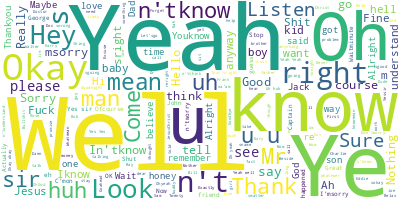

In [ ]:
# preprocessing
text = ""
for i in men_utterances['text']:
    text += i

word_tokens = word_tokenize(text)
filtered_text = [w for w in word_tokens if not w.lower() in stoplist]
processed_text = ""
for i in filtered_text:
    processed_text += i

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(processed_text)
# Visualize the word cloud
wordcloud.to_image()

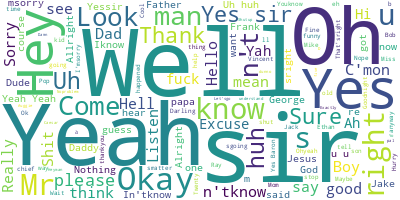

In [ ]:
# preprocessing
text = ""
for i in men_utterances_min['text']:
    text += i

word_tokens = word_tokenize(text)
filtered_text = [w for w in word_tokens if not w.lower() in stoplist]
processed_text = ""
for i in filtered_text:
    processed_text += i

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(processed_text)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# with stopwords (prominent)
cvec_men = CountVectorizer(ngram_range=(1,3))
ngrams = cvec_men.fit_transform(men_utterances['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_men.vocabulary_
df_ngram_men = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})

In [ ]:
df_ngram_men.head(20)

,frequency,unigram/bigram/trigram
0,86263,you
1,60725,the
2,47918,to
3,39545,it
4,28303,that
5,27268,and
6,23976,of
7,22658,what
8,20695,in
9,18745,me


In [ ]:
# without stopwords (prominent)
cvec_mens = CountVectorizer(stop_words=stoplist, ngram_range=(1,3))
ngrams = cvec_mens.fit_transform(men_utterances['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = cvec_mens.vocabulary_
df_ngram_mens= pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
df_ngram_mens['polarity'] = df_ngram_mens['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_mens['subjective'] = df_ngram_mens['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
mens_features = (cvec_mens.get_feature_names_out())

In [ ]:
df_ngram_mens.head(20)

,frequency,unigram/bigram/trigram,polarity,subjective
0,13090,know,0.000000,0.000000
1,8717,like,0.000000,0.000000
2,8688,get,0.000000,0.000000
3,7331,got,0.000000,0.000000
4,6572,one,0.000000,0.000000
5,6377,want,0.000000,0.000000
6,6345,think,0.000000,0.000000
7,6271,right,0.285714,0.535714
8,5888,well,0.000000,0.000000
9,5848,go,0.000000,0.000000


In [ ]:
print("Top 20 N-grams and Sentiment Analysis Scores for Prominent Male Speakers:")
df_ngram_mens[(df_ngram_mens['polarity'] != 0.0) | (df_ngram_mens['subjective'] != 0.0)].head(20)

Top 20 N-grams and Sentiment Analysis Scores for Prominent Male Speakers:


,frequency,unigram/bigram/trigram,polarity,subjective
7,6271,right,0.285714,0.535714
13,4517,good,0.700000,0.600000
31,2986,mean,-0.312500,0.687500
34,2768,okay,0.500000,0.500000
35,2686,little,-0.187500,0.500000
36,2617,sure,0.500000,0.888889
38,2502,really,0.200000,0.200000
45,2104,much,0.200000,0.200000
50,1850,sorry,-0.500000,1.000000
62,1678,first,0.250000,0.333333


In [ ]:
mens_len = len(df_ngram_mens['polarity'])
avg_pol = df_ngram_mens['polarity'].sum() / mens_len
avg_sub = df_ngram_mens['subjective'].sum() / mens_len
avg_neutral = len(df_ngram_mens[(df_ngram_mens['polarity'] == 0.0) & (df_ngram_mens['subjective'] == 0.0)]) / mens_len
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.023087578497307165
0.15861530449399466


In [ ]:
# without stop words (minor)
c_vec_mens_min = CountVectorizer(stop_words=stoplist, ngram_range=(1,3))
ngrams = c_vec_mens_min.fit_transform(men_utterances_min['text'])
count_values = ngrams.toarray().sum(axis=0)
vocab = c_vec_mens_min.vocabulary_
df_ngram_mens_min = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram/bigram/trigram'})
df_ngram_mens_min['polarity'] = df_ngram_mens_min['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_mens_min['subjective'] = df_ngram_mens_min['unigram/bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
mens_features_min = (c_vec_mens_min.get_feature_names_out())

In [ ]:
df_ngram_mens_min.head(20)

,frequency,unigram/bigram/trigram,polarity,subjective
0,296,know,0.000000,0.000000
1,242,got,0.000000,0.000000
2,213,get,0.000000,0.000000
3,199,like,0.000000,0.000000
4,172,sir,0.000000,0.000000
5,170,want,0.000000,0.000000
6,167,right,0.285714,0.535714
7,164,well,0.000000,0.000000
8,152,yeah,0.000000,0.000000
9,145,yes,0.000000,0.000000


In [ ]:
print("Top 20 N-grams and Sentiment Analysis Scores for Minor Male Speakers:")
df_ngram_mens_min[(df_ngram_mens_min['polarity'] != 0.0) | (df_ngram_mens_min['subjective'] != 0.0)].head(20)

Top 20 N-grams and Sentiment Analysis Scores for Minor Male Speakers:


,frequency,unigram/bigram/trigram,polarity,subjective
6,167,right,0.285714,0.535714
11,136,good,0.700000,0.600000
25,90,okay,0.500000,0.500000
32,77,sure,0.500000,0.888889
40,64,really,0.200000,0.200000
41,62,sorry,-0.500000,1.000000
42,62,mean,-0.312500,0.687500
44,58,little,-0.187500,0.500000
50,53,much,0.200000,0.200000
52,51,fuck,-0.400000,0.600000


In [ ]:
mens_min_len = len(df_ngram_mens_min['polarity'])
avg_pol = df_ngram_mens_min['polarity'].sum() / mens_min_len
avg_sub = df_ngram_mens_min['subjective'].sum() / mens_min_len
avg_neutral = len(df_ngram_mens_min[(df_ngram_mens_min['polarity'] == 0.0) & (df_ngram_mens_min['subjective'] == 0.0)]) / mens_min_len
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.7150239583931804
4.912327331957475


In [ ]:
# calculating TF-IDF scores for female speakers (prom)
t_vec_fems = TfidfVectorizer(ngram_range = (1,3))
X2 = t_vec_fems.fit_transform(fem_group['text'])
scores = (X2.toarray())

sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(fems_features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words_fems = (ranking.sort_values('rank', ascending = False))
words_fems['polarity'] = words_fems['term'].apply(lambda x: TextBlob(x).polarity)
words_fems['subjective'] = words_fems['term'].apply(lambda x: TextBlob(x).subjectivity)
print("Top 20 N-grams Ranked by TF-IDF for Prominent Female Speakers:")
words_fems.head(20)

Top 20 N-grams Ranked by TF-IDF for Prominent Female Speakers:


,term,rank,polarity,subjective
275803,maybe maybe voice,46.800043,0.000000,0.000000
134464,feel though stepped,35.796312,0.000000,0.000000
21327,ask lombardo pretty,31.619571,0.250000,1.000000
342458,pleasure someone,25.758947,0.000000,0.000000
397811,showing draggin,23.998933,0.000000,0.000000
224724,kip back park,23.860095,0.000000,0.000000
259532,lose uh yeah,21.590803,0.000000,0.000000
269855,man like,20.650195,0.000000,0.000000
301944,need healy,17.031192,0.000000,0.000000
220270,keepers,16.845029,0.000000,0.000000


In [ ]:
print(tabulate(words_fems.head(20), headers='keys', tablefmt="fancy_grid", showindex=False))
print(tabulate(words_fems.head(20), headers='keys', tablefmt="latex", showindex=False))

╒═════════════════════════════╤═════════╤════════════╤══════════════╕
│ term                        │    rank │   polarity │   subjective │
╞═════════════════════════════╪═════════╪════════════╪══════════════╡
│ maybe maybe voice           │ 46.8    │   0        │     0        │
├─────────────────────────────┼─────────┼────────────┼──────────────┤
│ feel though stepped         │ 35.7963 │   0        │     0        │
├─────────────────────────────┼─────────┼────────────┼──────────────┤
│ ask lombardo pretty         │ 31.6196 │   0.25     │     1        │
├─────────────────────────────┼─────────┼────────────┼──────────────┤
│ pleasure someone            │ 25.7589 │   0        │     0        │
├─────────────────────────────┼─────────┼────────────┼──────────────┤
│ showing draggin             │ 23.9989 │   0        │     0        │
├─────────────────────────────┼─────────┼────────────┼──────────────┤
│ kip back park               │ 23.8601 │   0        │     0        │
├───────────────────

In [ ]:
fems_tf_len = len(words_fems['polarity'])
avg_pol = words_fems['polarity'].sum() / fems_tf_len
avg_sub = words_fems['subjective'].sum() / fems_tf_len
avg_neutral = len(words_fems[(words_fems['polarity'] == 0.0) & (words_fems['subjective'] == 0.0)]) / fems_tf_len
tfidf_pol = []
tfidf_sub = []
tfidf_neu = []
tfidf_pol.append(avg_pol)
tfidf_sub.append(avg_sub)
tfidf_neu.append(avg_neutral)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.026922163272730226
0.18338797128675352
0.6782836317857054


In [ ]:
# minor chars
t_vec_fems_min = TfidfVectorizer(ngram_range = (1,3))
X2 = t_vec_fems_min.fit_transform(fem_group_min['text'])
scores = (X2.toarray())
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(fems_features_min):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words_fems_min = (ranking.sort_values('rank', ascending = False))
words_fems_min['polarity'] = words_fems_min['term'].apply(lambda x: TextBlob(x).polarity)
words_fems_min['subjective'] = words_fems_min['term'].apply(lambda x: TextBlob(x).subjectivity)
print("Top 20 N-grams Ranked by TF-IDF for Minor Female Speakers:")
words_fems_min.head(20)

Top 20 N-grams Ranked by TF-IDF for Minor Female Speakers:


,term,rank,polarity,subjective
27833,oh things,8.837797,0.0,0.00
13203,gasses render unconcious,7.282465,0.0,0.00
22422,look look mother,5.807365,0.0,0.00
2022,baby jesus,5.792640,0.0,0.00
34605,shoot insulted racket,5.185629,0.0,0.00
40358,took kids let,4.872713,0.0,0.00
27181,noir castle,4.826719,0.0,0.00
26139,naive mister,4.808779,-0.3,1.00
21897,liquor glass,4.111492,0.0,0.00
3456,boobs started,3.951939,0.0,0.00


In [ ]:
print(tabulate(words_fems_min.head(20), headers='keys', tablefmt="fancy_grid", showindex=False))
print(tabulate(words_fems_min.head(20), headers='keys', tablefmt="latex", showindex=False))

╒══════════════════════════╤═════════╤════════════╤══════════════╕
│ term                     │    rank │   polarity │   subjective │
╞══════════════════════════╪═════════╪════════════╪══════════════╡
│ oh things                │ 8.8378  │        0   │         0    │
├──────────────────────────┼─────────┼────────────┼──────────────┤
│ gasses render unconcious │ 7.28247 │        0   │         0    │
├──────────────────────────┼─────────┼────────────┼──────────────┤
│ look look mother         │ 5.80737 │        0   │         0    │
├──────────────────────────┼─────────┼────────────┼──────────────┤
│ baby jesus               │ 5.79264 │        0   │         0    │
├──────────────────────────┼─────────┼────────────┼──────────────┤
│ shoot insulted racket    │ 5.18563 │        0   │         0    │
├──────────────────────────┼─────────┼────────────┼──────────────┤
│ took kids let            │ 4.87271 │        0   │         0    │
├──────────────────────────┼─────────┼────────────┼───────────

In [ ]:
fems_min_tf_len = len(words_fems_min['polarity'])
avg_pol = words_fems_min['polarity'].sum() / fems_min_tf_len
avg_sub = words_fems_min['subjective'].sum() / fems_min_tf_len
avg_neutral = len(words_fems_min[(words_fems_min['polarity'] == 0.0) & (words_fems_min['subjective'] == 0.0)]) / fems_min_tf_len
tfidf_pol.append(avg_pol)
tfidf_sub.append(avg_sub)
tfidf_neu.append(avg_neutral)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.029840971106959453
0.17305981227916956
0.6965811027425836


In [ ]:
# repeating for final speakers
t_vec_fems = TfidfVectorizer(ngram_range = (1,3))
X2 = t_vec_fems.fit_transform(fem_group_final['text'])
scores = (X2.toarray())

sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(fems_features_final):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words_fems_final = (ranking.sort_values('rank', ascending = False))
words_fems_final['polarity'] = words_fems_final['term'].apply(lambda x: TextBlob(x).polarity)
words_fems_final['subjective'] = words_fems_final['term'].apply(lambda x: TextBlob(x).subjectivity)
print("Top 20 N-grams Ranked by TF-IDF for Prominent Female Speakers:")
words_fems_final.head(20)

Top 20 N-grams Ranked by TF-IDF for Prominent Female Speakers:


,term,rank,polarity,subjective
1616645,worry permanent damage,220.607056,0.000000,0.000000
832698,looks cake ballerina,148.417954,0.000000,0.000000
68681,armpits meatballs,120.572401,0.000000,0.000000
407316,every train pulls,111.062316,0.000000,0.000000
1595176,wine ok every,103.332837,0.500000,0.500000
1162230,repay anastasia music,92.027791,0.000000,0.000000
676201,ian realized reason,91.848750,0.000000,0.000000
1011100,okay go come,86.240663,0.500000,0.500000
783422,liam use drinking,84.058917,0.000000,0.000000
815294,live crazy owning,80.624748,-0.231818,0.700000


In [ ]:
print(tabulate(words_fems_final.head(20), headers='keys', tablefmt="fancy_grid", showindex=False))
print(tabulate(words_fems_final.head(20), headers='keys', tablefmt="latex", showindex=False))

╒════════════════════════╤══════════╤════════════╤══════════════╕
│ term                   │     rank │   polarity │   subjective │
╞════════════════════════╪══════════╪════════════╪══════════════╡
│ worry permanent damage │ 220.607  │  0         │     0        │
├────────────────────────┼──────────┼────────────┼──────────────┤
│ looks cake ballerina   │ 148.418  │  0         │     0        │
├────────────────────────┼──────────┼────────────┼──────────────┤
│ armpits meatballs      │ 120.572  │  0         │     0        │
├────────────────────────┼──────────┼────────────┼──────────────┤
│ every train pulls      │ 111.062  │  0         │     0        │
├────────────────────────┼──────────┼────────────┼──────────────┤
│ wine ok every          │ 103.333  │  0.5       │     0.5      │
├────────────────────────┼──────────┼────────────┼──────────────┤
│ repay anastasia music  │  92.0278 │  0         │     0        │
├────────────────────────┼──────────┼────────────┼──────────────┤
│ ian real

In [ ]:
fems_len_final = len(words_fems_final['polarity'])
avg_pol = words_fems_final['polarity'].sum() / fems_len_final
avg_sub = words_fems_final['subjective'].sum() / fems_len_final
avg_neutral = len(words_fems_final[(words_fems_final['polarity'] == 0.0) & (words_fems_final['subjective'] == 0.0)]) / fems_len_final
tfidf_pol.append(avg_pol)
tfidf_sub.append(avg_sub)
tfidf_neu.append(avg_neutral)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.02700043454668472
0.1800419680636253
0.6810667380392836


In [ ]:
t_vec_fems = TfidfVectorizer(ngram_range = (1,3))
X2 = t_vec_fems.fit_transform(fem_min_final['text'])
scores = (X2.toarray())

sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(fems_features_min_final):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words_fems_min_final = (ranking.sort_values('rank', ascending = False))
words_fems_min_final['polarity'] = words_fems_min_final['term'].apply(lambda x: TextBlob(x).polarity)
words_fems_min_final['subjective'] = words_fems_min_final['term'].apply(lambda x: TextBlob(x).subjectivity)
print("Top 20 N-grams Ranked by TF-IDF for Prominent Female Speakers:")
words_fems_min_final.head(20)

Top 20 N-grams Ranked by TF-IDF for Prominent Female Speakers:


,term,rank,polarity,subjective
33064,oh going,24.474080,0.000000,0.000000
15417,friend pukes shits,21.611456,0.000000,0.000000
26342,lines per,19.135775,0.000000,0.000000
32251,night cramming physics,16.982822,0.000000,0.000000
2451,aurillio,16.193074,0.000000,0.000000
31134,myers please,15.558170,0.000000,0.000000
40980,series tonight true,15.492464,0.350000,0.650000
45776,talking phone,14.405961,0.000000,0.000000
47490,till martha hears,14.266679,0.000000,0.000000
3991,better throw treats,14.062703,0.500000,0.500000


In [ ]:
print(tabulate(words_fems_min_final.head(20), headers='keys', tablefmt="fancy_grid", showindex=False))
print(tabulate(words_fems_min_final.head(20), headers='keys', tablefmt="latex", showindex=False))

╒════════════════════════╤═════════╤════════════╤══════════════╕
│ term                   │    rank │   polarity │   subjective │
╞════════════════════════╪═════════╪════════════╪══════════════╡
│ oh going               │ 24.4741 │   0        │     0        │
├────────────────────────┼─────────┼────────────┼──────────────┤
│ friend pukes shits     │ 21.6115 │   0        │     0        │
├────────────────────────┼─────────┼────────────┼──────────────┤
│ lines per              │ 19.1358 │   0        │     0        │
├────────────────────────┼─────────┼────────────┼──────────────┤
│ night cramming physics │ 16.9828 │   0        │     0        │
├────────────────────────┼─────────┼────────────┼──────────────┤
│ aurillio               │ 16.1931 │   0        │     0        │
├────────────────────────┼─────────┼────────────┼──────────────┤
│ myers please           │ 15.5582 │   0        │     0        │
├────────────────────────┼─────────┼────────────┼──────────────┤
│ series tonight true    

In [ ]:
fems_len_min = len(words_fems_min_final['polarity'])
avg_pol = words_fems_min_final['polarity'].sum() / fems_len_min
avg_sub = words_fems_min_final['subjective'].sum() / fems_len_min
avg_neutral = len(words_fems_min_final[(words_fems_min_final['polarity'] == 0.0) & (words_fems_min_final['subjective'] == 0.0)]) / fems_len_min
tfidf_pol.append(avg_pol)
tfidf_sub.append(avg_sub)
tfidf_neu.append(avg_neutral)
print(avg_pol)
print(avg_sub)
print(avg_neutral)

0.02720112607549941
0.15671007897876796
0.7267648364658872


In [ ]:
data = {'Group': ['Original Female','Original Female Minor', 'Final Female', 'Final Female Minor'],
        'Average Polarity': tfidf_pol,
        'Average Subjectivity': tfidf_sub,
        'Average Neutral': tfidf_neu}
female_tfidf_stats = pd.DataFrame(data)
print(tabulate(female_tfidf_stats, headers='keys', tablefmt="latex", showindex = False))

\begin{tabular}{lrrr}
\hline
 Group                 &   Average Polarity &   Average Subjectivity &   Average Neutral \\
\hline
 Original Female       &          0.0269222 &               0.183388 &          0.678284 \\
 Original Female Minor &          0.029841  &               0.17306  &          0.696581 \\
 Final Female          &          0.0270004 &               0.180042 &          0.681067 \\
 Final Female Minor    &          0.0272011 &               0.15671  &          0.726765 \\
\hline
\end{tabular}


In [ ]:
# calculating TF-IDF scores for male speakers (prom)
t_vec_mens = TfidfVectorizer(ngram_range = (1,3))
X2 = t_vec_mens.fit_transform(men_utterances['text'])
scores = (X2.toarray())

sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(mens_features):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words_mens = (ranking.sort_values('rank', ascending = False))
words_mens['polarity'] = words_mens['term'].apply(lambda x: TextBlob(x).polarity)
words_mens['subjective'] = words_mens['term'].apply(lambda x: TextBlob(x).subjectivity)
print ("Top 20 N-grams Ranked by TF-IDF for Prominent Male Speakers:")
words_mens.head(20)

Top 20 N-grams Ranked by TF-IDF for Prominent Male Speakers:


,term,rank
591142,months vienna,2297.625382
806160,shot us one,2030.634230
727299,real careful around,1347.336379
299142,four hundred years,1321.765818
642394,okay intelligence thinktelligence,1287.369134
288594,five nights ago,1277.893579
45850,asses anyway,1274.037030
833624,sonny let get,1238.430228
577039,might time,1227.730968
553139,many guests wondering,1106.494995


In [ ]:
mens_tf_len = len(words_mens['polarity'])
avg_pol = words_mens['polarity'].sum() / mens_tf_len
avg_sub = words_mens['subjective'].sum() / mens_tf_len
avg_neutral = len(words_mens[(words_mens['polarity'] == 0.0) & (words_mens['subjective'] == 0.0)]) / mens_tf_len
print(avg_pol)
print(avg_sub)
print(avg_neutral)

In [ ]:
# minor
t_vec_mens_min = TfidfVectorizer(ngram_range = (1,3))
X2 = t_vec_mens_min.fit_transform(men_utterances_min['text'])
scores = (X2.toarray())

sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(mens_features_min):
    data1.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data1, columns = ['term','rank'])
words_mens_min = (ranking.sort_values('rank', ascending = False))
words_mens_min['polarity'] = words_mens_min['term'].apply(lambda x: TextBlob(x).polarity)
words_mens_min['subjective'] = words_mens_min['term'].apply(lambda x: TextBlob(x).subjectivity)
print ("Top 20 N-grams Ranked by TF-IDF for Minor Male Speakers:")
words_mens_min.head(20)

Top 20 N-grams Ranked by TF-IDF for Minor Male Speakers:


,term,rank
23490,read saw movie,86.769696
32170,well explains,78.854125
22904,processor,48.850357
19100,month duke,42.951665
11222,gonna send,42.120128
29193,thing starts box,41.774380
11695,got take back,41.409250
22055,photon,41.363582
1771,bad feeling,41.226799
33378,yeah alternator right,37.427398


In [ ]:
mens_min_tf_len = len(words_mens_min['polarity'])
avg_pol = words_mens_min['polarity'].sum() / mens_tf_len
avg_sub = words_mens_min['subjective'].sum() / mens_tf_len
avg_neutral = len(words_mens_min[(words_mens_min['polarity'] == 0.0) & (words_mens_min['subjective'] == 0.0)]) / mens_min_tf_len
print(avg_pol)
print(avg_sub)
print(avg_neutral)

In [ ]:
# compiling all fem utterances to feed into model (prominent)
text = ""
for i in fem_utterances['text']:
    text += i

# Cleaing the text
processed_text = text.lower()
processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)
processed_text = re.sub(r'\s+', ' ', processed_text)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_text)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [ ]:
word2vec_fem = Word2Vec(all_words, min_count=2)

In [ ]:
word2vec_fem.wv.most_similar('woman')

[('mr', 0.4803234338760376),
 ('love', 0.44696319103240967),
 ('party', 0.4229375720024109),
 ('let', 0.4162241518497467),
 ('venture', 0.4133265018463135),
 ('herr', 0.40310028195381165),
 ('know', 0.39477503299713135),
 ('tepid', 0.393472820520401),
 ('look', 0.38710954785346985),
 ('sorry', 0.38339003920555115)]

In [ ]:
# compiling all men utterances to feed into model (prominent)
text = ""
for i in men_utterances['text']:
    text += i

# Cleaing the text
processed_text = text.lower()
processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)
processed_text = re.sub(r'\s+', ' ', processed_text)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_text)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [ ]:
word2vec_men = Word2Vec(all_words, min_count=2)